# Yu et al - "Math modeling of fluconazole resistance in C. albicans"

## Model

In [1]:
# Imports
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib as mpl

# Constants
COLOR1 = 'lightsteelblue'
COLOR2 = 'cornflowerblue'
COLOR3 = 'royalblue'
COLOR4 = 'darkblue'
RED = 'tab:red'
BLUE = 'tab:blue'

STEPS = 10000
DAYS = 1

AZOLE_FIT = 52.24           # 16 ug/ml (Kelly, 1997)
LANOSTEROL = 25*AZOLE_FIT
ENZYME = 2*AZOLE_FIT
AZOLE = 6.53                # MIC90 breakpoint for susceptible: 2 ug/ml (Alizadeh, 2017)

mpl.rcParams['lines.linewidth'] = 6
mpl.rc('axes', labelsize = 18)
mpl.rcParams.update({'font.size': 18})
mpl.rcParams['legend.loc'] = 'best'

# Model without azole
def model(y, t, k):
  # Initial condition
  R1 = y[0]
  E1tot = y[1]
  C1 = y[2]
  R2 = y[3]
  E2tot = y[4]
  C2 = y[5]
  R3 = y[6]
  E3tot = y[7]
  C3 = y[8]
  P = y[9]
  R1a = y[10]
  C1a = y[11]
  C2a = y[12]
  R2a = y[13]
  R3a = y[14]
  R4a = y[15]
  C3a = y[16]
  Pa = y[17]

  # Parameters (Kelly, 1997)
  ## Lanosterol-C14a-demethylase Complex
  kf1 = k[0]
  kb1 = k[1]
  kf4 = k[2]

  ## Zymosterol-Sterol-methyltransferase Complex
  kf2 = k[3]
  kb2 = k[4]
  kf5 = k[5]

  ## Episterol-C5-desaturase Complex
  kf3 = k[6]
  kb3 = k[7]
  kf6 = k[8]

  ## Alternative pathway
  kf1a = k[9]
  kb1a = k[10]
  kf2a = k[11]
  kb2a = k[12]
  kf4a = k[13]
  kf3a = k[14]
  kb3a = k[15]
  kf7a = k[16]
  kf5a = k[17]
  kf6a = k[18]

  # Constraint
  E1 = E1tot - C1 - C1a
  E2 = E2tot - C2 - C2a
  E3 = E3tot - C3 - C3a
  
  # ODEs
  dR1dt = kb1*C1 + kb2a*C2a - kf1*R1*E1 - kf2a*R1*E2
  dE1dt = kb1*C1 + kf4*C1 + kb1a*C1a - kf1*R1*E1 - kf1a*R1a*E1
  dC1dt = kf1*R1*E1 - kb1*C1 - kf4*C1
  dR2dt = kf4*C1 + kb2*C2 - kf2*R2*E2
  dE2dt = kb2*C2 + kf5*C2 + kb2a*C2a + kf4a*C2a- kf2*R2*E2 - kf2a*R1*E2
  dC2dt = kf2*R2*E2 - kb2*C2 - kf5*C2
  dR3dt = kf5*C2 + kb3*C3 - kf3*R3*E3
  dE3dt = kb3*C3 + kf6*C3 + kb3a*C3a + kf7a*C3a - kf3*R3*E3 - kf3a*R4a*E3
  dC3dt = kf3*R3*E3 - kb3*C3 - kf6*C3
  dPdt = kf6*C3

  dR1adt = kb1a*C1a - kf1a*R1a*E1
  dC1adt = kf1a*R1a*E1 - kb1a*C1a
  dC2adt = kf2a*R1*E2 - kb2a*C2a - kf4a*C2a
  dR2adt = kf4a*C2a - kf5a*R2a
  dR3adt = kf5a*R2a - kf6a*R3a
  dR4adt = kf6a*R3a + kb3a*C3a - kf3a*R4a*E3
  dC3adt = kf3a*R4a*E3 - kb3a*C3a - kf7a*C3a
  dPadt = kf7a*C3a 

  dydt = [dR1dt, dE1dt, dC1dt, dR2dt, dE2dt, dC2dt, dR3dt, dE3dt, dC3dt, dPdt, dR1adt, dC1adt, dC2adt, dR2adt, dR3adt, dR4adt, dC3adt, dPadt]
  return dydt


## Study 6: Vary kf1

In [2]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KF1_no_c1 = 0
KF1_no_c3 = 0.0000825
KF1_no_c2 = 0.9*KF1_no_c3
KF1_no_c4 = 1.1*KF1_no_c3
K0_no_azole_c1 = [KF1_no_c1,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c2 = [KF1_no_c2,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c3 = [KF1_no_c3,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c4 = [KF1_no_c4,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
KF1_c1 = 0
KF1_c3 = 0.0001
KF1_c2 = 0.9*KF1_c3
KF1_c4 = 1.1*KF1_c3
K0_azole_c1 = [KF1_c1,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c2 = [KF1_c2,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c3 = [KF1_c3,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c4 = [KF1_c4,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kf1 = 0
Y0_s6_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s6_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s6_c1 = []
y_s6_c1_no_azole = []

## Case 2: kf1 = 0.1x
Y0_s6_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s6_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s6_c2 = []
y_s6_c2_no_azole = []

## Case 3: kf1 = 1x
Y0_s6_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s6_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s6_c3 = []
y_s6_c3_no_azole = []

## Case 4: kf1 = 10x
Y0_s6_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s6_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s6_c4 = []
y_s6_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s6_c1_no_azole = odeint(model, Y0_s6_c1_no_azole, t, (K0_no_azole_c1,))
y_s6_c2_no_azole = odeint(model, Y0_s6_c2_no_azole, t, (K0_no_azole_c2,))
y_s6_c3_no_azole = odeint(model, Y0_s6_c3_no_azole, t, (K0_no_azole_c3,))
y_s6_c4_no_azole = odeint(model, Y0_s6_c4_no_azole, t, (K0_no_azole_c4,))

y_s6_c1 = odeint(model, Y0_s6_c1, t, (K0_azole_c1,))
y_s6_c2 = odeint(model, Y0_s6_c2, t, (K0_azole_c2,))
y_s6_c3 = odeint(model, Y0_s6_c3, t, (K0_azole_c3,))
y_s6_c4 = odeint(model, Y0_s6_c4, t, (K0_azole_c4,))

print('Case 1: kf1 = 0')
sterol_total = y_s6_c1[-1,0] + y_s6_c1[-1,3] + y_s6_c1[-1,6] + y_s6_c1[-1,9] + y_s6_c1[-1,13] + y_s6_c1[-1,14] + y_s6_c1[-1,15] + y_s6_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c1[-1,0], pct=(y_s6_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c1[-1,3], pct=(y_s6_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c1[-1,6], pct=(y_s6_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c1[-1,9], pct=(y_s6_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c1[-1,13], pct=(y_s6_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c1[-1,14], pct=(y_s6_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c1[-1,15], pct=(y_s6_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c1[-1,17], pct=(y_s6_c1[-1,17]/sterol_total)*100))
  print('')

if y_s6_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s6_c1_no_azole[-1,9]-y_s6_c1[-1,9])/y_s6_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kf1 = 0.1x')
sterol_total = y_s6_c2[-1,0] + y_s6_c2[-1,3] + y_s6_c2[-1,6] + y_s6_c2[-1,9] + y_s6_c2[-1,13] + y_s6_c2[-1,14] + y_s6_c2[-1,15] + y_s6_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c2[-1,0], pct=(y_s6_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c2[-1,3], pct=(y_s6_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c2[-1,6], pct=(y_s6_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c2[-1,9], pct=(y_s6_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c2[-1,13], pct=(y_s6_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c2[-1,14], pct=(y_s6_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c2[-1,15], pct=(y_s6_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c2[-1,17], pct=(y_s6_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s6_c2_no_azole[-1,9]-y_s6_c2[-1,9])/y_s6_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kf1 = 1x')
sterol_total = y_s6_c3[-1,0] + y_s6_c3[-1,3] + y_s6_c3[-1,6] + y_s6_c3[-1,9] + y_s6_c3[-1,13] + y_s6_c3[-1,14] + y_s6_c3[-1,15] + y_s6_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c3[-1,0], pct=(y_s6_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c3[-1,3], pct=(y_s6_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c3[-1,6], pct=(y_s6_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c3[-1,9], pct=(y_s6_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c3[-1,13], pct=(y_s6_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c3[-1,14], pct=(y_s6_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c3[-1,15], pct=(y_s6_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c3[-1,17], pct=(y_s6_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s6_c3_no_azole[-1,9]-y_s6_c3[-1,9])/y_s6_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kf1 = 10x')
sterol_total = y_s6_c4[-1,0] + y_s6_c4[-1,3] + y_s6_c4[-1,6] + y_s6_c4[-1,9] + y_s6_c4[-1,13] + y_s6_c4[-1,14] + y_s6_c4[-1,15] + y_s6_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c4[-1,0], pct=(y_s6_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c4[-1,3], pct=(y_s6_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c4[-1,6], pct=(y_s6_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c4[-1,9], pct=(y_s6_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c4[-1,13], pct=(y_s6_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c4[-1,14], pct=(y_s6_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c4[-1,15], pct=(y_s6_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s6_c4[-1,17], pct=(y_s6_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s6_c4_no_azole[-1,9]-y_s6_c4[-1,9])/y_s6_c4_no_azole[-1,9])*100))

Case 1: kf1 = 0
Lanosterol: 10.82 (0.85%)
Zymosterol: 0.00 (0.00%)
Episterol: 0.00 (0.00%)
Ergosterol: 0.00 (0.00%)

Eburicol: 218.46 (17.11%)
Obtusifoliol: 457.98 (35.86%)
14a-methylfecosterol: 0.18 (0.01%)
14a-methyl-3,6-diol: 589.71 (46.17%)


Case 2: kf1 = 0.1x
Lanosterol: 0.01 (0.00%)
Zymosterol: 73.92 (5.90%)
Episterol: 622.33 (49.71%)
Ergosterol: 64.66 (5.16%)

Eburicol: 51.27 (4.09%)
Obtusifoliol: 161.17 (12.87%)
14a-methylfecosterol: 46.18 (3.69%)
14a-methyl-3,6-diol: 232.46 (18.57%)

% Ergosterol reduction: 94.73%

Case 3: kf1 = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kf1 = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 76.43 (6.10%)
Episterol: 663.35 (52.99%)
Ergosterol: 66.06 (5.28%)

Eburicol: 44.92 (3.59%)
Obtusifoliol: 144.84 (11.57%)
14a-methyl

## Study 7: Vary kb1

In [3]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KB1_no_c1 = 0
KB1_no_c3 = 0.1
KB1_no_c2 = 0.9*KB1_no_c3
KB1_no_c4 = 1.1*KB1_no_c3
K0_no_azole_c1 = [0.0000825,KB1_no_c1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c2 = [0.0000825,KB1_no_c2,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c3 = [0.0000825,KB1_no_c3,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c4 = [0.0000825,KB1_no_c4,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
KB1_c1 = 0
KB1_c3 = 0.1
KB1_c2 = 0.9*KB1_c3
KB1_c4 = 1.1*KB1_c3
K0_azole_c1 = [0.0001,KB1_c1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c2 = [0.0001,KB1_c2,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c3 = [0.0001,KB1_c3,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c4 = [0.0001,KB1_c4,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kb1 = 0
Y0_s7_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s7_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s7_c1 = []
y_s7_c1_no_azole = []

## Case 2: kb1 = 0.1x
Y0_s7_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s7_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s7_c2 = []
y_s7_c2_no_azole = []

## Case 3: kb1 = 1x
Y0_s7_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s7_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s7_c3 = []
y_s7_c3_no_azole = []

## Case 4: kb1 = 10x
Y0_s7_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s7_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s7_c4 = []
y_s7_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s7_c1_no_azole = odeint(model, Y0_s7_c1_no_azole, t, (K0_no_azole_c1,))
y_s7_c2_no_azole = odeint(model, Y0_s7_c2_no_azole, t, (K0_no_azole_c2,))
y_s7_c3_no_azole = odeint(model, Y0_s7_c3_no_azole, t, (K0_no_azole_c3,))
y_s7_c4_no_azole = odeint(model, Y0_s7_c4_no_azole, t, (K0_no_azole_c4,))

y_s7_c1 = odeint(model, Y0_s7_c1, t, (K0_azole_c1,))
y_s7_c2 = odeint(model, Y0_s7_c2, t, (K0_azole_c2,))
y_s7_c3 = odeint(model, Y0_s7_c3, t, (K0_azole_c3,))
y_s7_c4 = odeint(model, Y0_s7_c4, t, (K0_azole_c4,))

print('Case 1: kb1 = 0')
sterol_total = y_s7_c1[-1,0] + y_s7_c1[-1,3] + y_s7_c1[-1,6] + y_s7_c1[-1,9] + y_s7_c1[-1,13] + y_s7_c1[-1,14] + y_s7_c1[-1,15] + y_s7_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c1[-1,0], pct=(y_s7_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c1[-1,3], pct=(y_s7_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c1[-1,6], pct=(y_s7_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c1[-1,9], pct=(y_s7_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c1[-1,13], pct=(y_s7_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c1[-1,14], pct=(y_s7_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c1[-1,15], pct=(y_s7_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c1[-1,17], pct=(y_s7_c1[-1,17]/sterol_total)*100))
  print('')

if y_s7_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s7_c1_no_azole[-1,9]-y_s7_c1[-1,9])/y_s7_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kb1 = 0.1x')
sterol_total = y_s7_c2[-1,0] + y_s7_c2[-1,3] + y_s7_c2[-1,6] + y_s7_c2[-1,9] + y_s7_c2[-1,13] + y_s7_c2[-1,14] + y_s7_c2[-1,15] + y_s7_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c2[-1,0], pct=(y_s7_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c2[-1,3], pct=(y_s7_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c2[-1,6], pct=(y_s7_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c2[-1,9], pct=(y_s7_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c2[-1,13], pct=(y_s7_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c2[-1,14], pct=(y_s7_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c2[-1,15], pct=(y_s7_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c2[-1,17], pct=(y_s7_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s7_c2_no_azole[-1,9]-y_s7_c2[-1,9])/y_s7_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kb1 = 1x')
sterol_total = y_s7_c3[-1,0] + y_s7_c3[-1,3] + y_s7_c3[-1,6] + y_s7_c3[-1,9] + y_s7_c3[-1,13] + y_s7_c3[-1,14] + y_s7_c3[-1,15] + y_s7_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c3[-1,0], pct=(y_s7_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c3[-1,3], pct=(y_s7_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c3[-1,6], pct=(y_s7_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c3[-1,9], pct=(y_s7_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c3[-1,13], pct=(y_s7_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c3[-1,14], pct=(y_s7_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c3[-1,15], pct=(y_s7_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c3[-1,17], pct=(y_s7_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s7_c3_no_azole[-1,9]-y_s7_c3[-1,9])/y_s7_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kb1 = 10x')
sterol_total = y_s7_c4[-1,0] + y_s7_c4[-1,3] + y_s7_c4[-1,6] + y_s7_c4[-1,9] + y_s7_c4[-1,13] + y_s7_c4[-1,14] + y_s7_c4[-1,15] + y_s7_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c4[-1,0], pct=(y_s7_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c4[-1,3], pct=(y_s7_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c4[-1,6], pct=(y_s7_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c4[-1,9], pct=(y_s7_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c4[-1,13], pct=(y_s7_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c4[-1,14], pct=(y_s7_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c4[-1,15], pct=(y_s7_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s7_c4[-1,17], pct=(y_s7_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s7_c4_no_azole[-1,9]-y_s7_c4[-1,9])/y_s7_c4_no_azole[-1,9])*100))

Case 1: kb1 = 0
Lanosterol: 0.00 (0.00%)
Zymosterol: 79.65 (6.36%)
Episterol: 719.44 (57.47%)
Ergosterol: 67.92 (5.43%)

Eburicol: 36.86 (2.94%)
Obtusifoliol: 122.94 (9.82%)
14a-methylfecosterol: 39.05 (3.12%)
14a-methyl-3,6-diol: 186.02 (14.86%)

% Ergosterol reduction: 94.53%

Case 2: kb1 = 0.1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.70 (6.05%)
Episterol: 651.23 (52.02%)
Ergosterol: 65.64 (5.24%)

Eburicol: 46.75 (3.73%)
Obtusifoliol: 149.63 (11.95%)
14a-methylfecosterol: 44.28 (3.54%)
14a-methyl-3,6-diol: 218.73 (17.47%)

% Ergosterol reduction: 94.67%

Case 3: kb1 = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kb1 = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 74.87 (5.98%)
Episterol: 637.57 (50.92%)
Ergosterol: 65.18 (5.21%)

Eburicol: 48.87 (3.90%)
Obtusif

## Study 8: Vary kf4

In [4]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KF4_no_c1 = 0
KF4_no_c3 = 0.1
KF4_no_c2 = 0.9*KF4_no_c3
KF4_no_c4 = 1.1*KF4_no_c3
K0_no_azole_c1 = [0.0000825,0.1,KF4_no_c1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c2 = [0.0000825,0.1,KF4_no_c2,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c3 = [0.0000825,0.1,KF4_no_c3,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c4 = [0.0000825,0.1,KF4_no_c4,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
KF4_c1 = 0
KF4_c3 = 0.2
KF4_c2 = 0.9*KF4_c3
KF4_c4 = 1.1*KF4_c3
K0_azole_c1 = [0.0001,0.1,KF4_c1,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c2 = [0.0001,0.1,KF4_c2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c3 = [0.0001,0.1,KF4_c3,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c4 = [0.0001,0.1,KF4_c4,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kf4 = 0
Y0_s8_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s8_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s8_c1 = []
y_s8_c1_no_azole = []

## Case 2: kf4 = 0.1x
Y0_s8_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s8_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s8_c2 = []
y_s8_c2_no_azole = []

## Case 3: kf4 = 1x
Y0_s8_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s8_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s8_c3 = []
y_s8_c3_no_azole = []

## Case 4: kf4 = 10x
Y0_s8_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s8_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s8_c4 = []
y_s8_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s8_c1_no_azole = odeint(model, Y0_s8_c1_no_azole, t, (K0_no_azole_c1,))
y_s8_c2_no_azole = odeint(model, Y0_s8_c2_no_azole, t, (K0_no_azole_c2,))
y_s8_c3_no_azole = odeint(model, Y0_s8_c3_no_azole, t, (K0_no_azole_c3,))
y_s8_c4_no_azole = odeint(model, Y0_s8_c4_no_azole, t, (K0_no_azole_c4,))

y_s8_c1 = odeint(model, Y0_s8_c1, t, (K0_azole_c1,))
y_s8_c2 = odeint(model, Y0_s8_c2, t, (K0_azole_c2,))
y_s8_c3 = odeint(model, Y0_s8_c3, t, (K0_azole_c3,))
y_s8_c4 = odeint(model, Y0_s8_c4, t, (K0_azole_c4,))

print('Case 1: kf4 = 0')
sterol_total = y_s8_c1[-1,0] + y_s8_c1[-1,3] + y_s8_c1[-1,6] + y_s8_c1[-1,9] + y_s8_c1[-1,13] + y_s8_c1[-1,14] + y_s8_c1[-1,15] + y_s8_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c1[-1,0], pct=(y_s8_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c1[-1,3], pct=(y_s8_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c1[-1,6], pct=(y_s8_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c1[-1,9], pct=(y_s8_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c1[-1,13], pct=(y_s8_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c1[-1,14], pct=(y_s8_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c1[-1,15], pct=(y_s8_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c1[-1,17], pct=(y_s8_c1[-1,17]/sterol_total)*100))
  print('')

if y_s8_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s8_c1_no_azole[-1,9]-y_s8_c1[-1,9])/y_s8_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kf4 = 0.1x')
sterol_total = y_s8_c2[-1,0] + y_s8_c2[-1,3] + y_s8_c2[-1,6] + y_s8_c2[-1,9] + y_s8_c2[-1,13] + y_s8_c2[-1,14] + y_s8_c2[-1,15] + y_s8_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c2[-1,0], pct=(y_s8_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c2[-1,3], pct=(y_s8_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c2[-1,6], pct=(y_s8_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c2[-1,9], pct=(y_s8_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c2[-1,13], pct=(y_s8_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c2[-1,14], pct=(y_s8_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c2[-1,15], pct=(y_s8_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c2[-1,17], pct=(y_s8_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s8_c2_no_azole[-1,9]-y_s8_c2[-1,9])/y_s8_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kf4 = 1x')
sterol_total = y_s8_c3[-1,0] + y_s8_c3[-1,3] + y_s8_c3[-1,6] + y_s8_c3[-1,9] + y_s8_c3[-1,13] + y_s8_c3[-1,14] + y_s8_c3[-1,15] + y_s8_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c3[-1,0], pct=(y_s8_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c3[-1,3], pct=(y_s8_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c3[-1,6], pct=(y_s8_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c3[-1,9], pct=(y_s8_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c3[-1,13], pct=(y_s8_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c3[-1,14], pct=(y_s8_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c3[-1,15], pct=(y_s8_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c3[-1,17], pct=(y_s8_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s8_c3_no_azole[-1,9]-y_s8_c3[-1,9])/y_s8_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kf4 = 10x')
sterol_total = y_s8_c4[-1,0] + y_s8_c4[-1,3] + y_s8_c4[-1,6] + y_s8_c4[-1,9] + y_s8_c4[-1,13] + y_s8_c4[-1,14] + y_s8_c4[-1,15] + y_s8_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c4[-1,0], pct=(y_s8_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c4[-1,3], pct=(y_s8_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c4[-1,6], pct=(y_s8_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c4[-1,9], pct=(y_s8_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c4[-1,13], pct=(y_s8_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c4[-1,14], pct=(y_s8_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c4[-1,15], pct=(y_s8_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s8_c4[-1,17], pct=(y_s8_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s8_c4_no_azole[-1,9]-y_s8_c4[-1,9])/y_s8_c4_no_azole[-1,9])*100))

Case 1: kf4 = 0
Lanosterol: 13.35 (1.05%)
Zymosterol: 0.00 (0.00%)
Episterol: 0.00 (0.00%)
Ergosterol: 0.00 (0.00%)

Eburicol: 222.61 (17.45%)
Obtusifoliol: 456.59 (35.78%)
14a-methylfecosterol: 0.18 (0.01%)
14a-methyl-3,6-diol: 583.19 (45.71%)


Case 2: kf4 = 0.1x
Lanosterol: 0.01 (0.00%)
Zymosterol: 74.42 (5.94%)
Episterol: 628.44 (50.20%)
Ergosterol: 64.80 (5.18%)

Eburicol: 50.14 (4.00%)
Obtusifoliol: 158.59 (12.67%)
14a-methylfecosterol: 45.77 (3.66%)
14a-methyl-3,6-diol: 229.83 (18.36%)

% Ergosterol reduction: 94.72%

Case 3: kf4 = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kf4 = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 76.01 (6.07%)
Episterol: 657.86 (52.55%)
Ergosterol: 65.93 (5.27%)

Eburicol: 45.88 (3.66%)
Obtusifoliol: 147.11 (11.75%)
14a-methyl

## Study 9: Vary kf2

In [5]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KF2_no_c1 = 0
KF2_no_c3 = 0.00017
KF2_no_c2 = 0.9*KF2_no_c3
KF2_no_c4 = 1.1*KF2_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,KF2_no_c1,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c2 = [0.0000825,0.1,0.1,KF2_no_c2,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c3 = [0.0000825,0.1,0.1,KF2_no_c3,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c4 = [0.0000825,0.1,0.1,KF2_no_c4,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
KF2_c1 = 0
KF2_c3 = 0.000045
KF2_c2 = 0.9*KF2_c3
KF2_c4 = 1.1*KF2_c3
K0_azole_c1 = [0.0001,0.1,0.2,KF2_c1,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c2 = [0.0001,0.1,0.2,KF2_c2,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c3 = [0.0001,0.1,0.2,KF2_c3,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c4 = [0.0001,0.1,0.2,KF2_c4,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kf2 = 0
Y0_s9_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s9_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s9_c1 = []
y_s9_c1_no_azole = []

## Case 2: kf2 = 0.1x
Y0_s9_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s9_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s9_c2 = []
y_s9_c2_no_azole = []

## Case 3: kf2 = 1x
Y0_s9_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s9_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s9_c3 = []
y_s9_c3_no_azole = []

## Case 4: kf2 = 10x
Y0_s9_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s9_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s9_c4 = []
y_s9_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s9_c1_no_azole = odeint(model, Y0_s9_c1_no_azole, t, (K0_no_azole_c1,))
y_s9_c2_no_azole = odeint(model, Y0_s9_c2_no_azole, t, (K0_no_azole_c2,))
y_s9_c3_no_azole = odeint(model, Y0_s9_c3_no_azole, t, (K0_no_azole_c3,))
y_s9_c4_no_azole = odeint(model, Y0_s9_c4_no_azole, t, (K0_no_azole_c4,))

y_s9_c1 = odeint(model, Y0_s9_c1, t, (K0_azole_c1,))
y_s9_c2 = odeint(model, Y0_s9_c2, t, (K0_azole_c2,))
y_s9_c3 = odeint(model, Y0_s9_c3, t, (K0_azole_c3,))
y_s9_c4 = odeint(model, Y0_s9_c4, t, (K0_azole_c4,))

print('Case 1: kf2 = 0')
sterol_total = y_s9_c1[-1,0] + y_s9_c1[-1,3] + y_s9_c1[-1,6] + y_s9_c1[-1,9] + y_s9_c1[-1,13] + y_s9_c1[-1,14] + y_s9_c1[-1,15] + y_s9_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c1[-1,0], pct=(y_s9_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c1[-1,3], pct=(y_s9_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c1[-1,6], pct=(y_s9_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c1[-1,9], pct=(y_s9_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c1[-1,13], pct=(y_s9_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c1[-1,14], pct=(y_s9_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c1[-1,15], pct=(y_s9_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c1[-1,17], pct=(y_s9_c1[-1,17]/sterol_total)*100))
  print('')

if y_s9_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s9_c1_no_azole[-1,9]-y_s9_c1[-1,9])/y_s9_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kf2 = 0.1x')
sterol_total = y_s9_c2[-1,0] + y_s9_c2[-1,3] + y_s9_c2[-1,6] + y_s9_c2[-1,9] + y_s9_c2[-1,13] + y_s9_c2[-1,14] + y_s9_c2[-1,15] + y_s9_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c2[-1,0], pct=(y_s9_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c2[-1,3], pct=(y_s9_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c2[-1,6], pct=(y_s9_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c2[-1,9], pct=(y_s9_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c2[-1,13], pct=(y_s9_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c2[-1,14], pct=(y_s9_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c2[-1,15], pct=(y_s9_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c2[-1,17], pct=(y_s9_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s9_c2_no_azole[-1,9]-y_s9_c2[-1,9])/y_s9_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kf2 = 1x')
sterol_total = y_s9_c3[-1,0] + y_s9_c3[-1,3] + y_s9_c3[-1,6] + y_s9_c3[-1,9] + y_s9_c3[-1,13] + y_s9_c3[-1,14] + y_s9_c3[-1,15] + y_s9_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c3[-1,0], pct=(y_s9_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c3[-1,3], pct=(y_s9_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c3[-1,6], pct=(y_s9_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c3[-1,9], pct=(y_s9_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c3[-1,13], pct=(y_s9_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c3[-1,14], pct=(y_s9_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c3[-1,15], pct=(y_s9_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c3[-1,17], pct=(y_s9_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s9_c3_no_azole[-1,9]-y_s9_c3[-1,9])/y_s9_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kf2 = 10x')
sterol_total = y_s9_c4[-1,0] + y_s9_c4[-1,3] + y_s9_c4[-1,6] + y_s9_c4[-1,9] + y_s9_c4[-1,13] + y_s9_c4[-1,14] + y_s9_c4[-1,15] + y_s9_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c4[-1,0], pct=(y_s9_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c4[-1,3], pct=(y_s9_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c4[-1,6], pct=(y_s9_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c4[-1,9], pct=(y_s9_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c4[-1,13], pct=(y_s9_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c4[-1,14], pct=(y_s9_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c4[-1,15], pct=(y_s9_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s9_c4[-1,17], pct=(y_s9_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s9_c4_no_azole[-1,9]-y_s9_c4[-1,9])/y_s9_c4_no_azole[-1,9])*100))

Case 1: kf2 = 0
Lanosterol: 0.00 (0.00%)
Zymosterol: 796.23 (61.45%)
Episterol: 0.00 (0.00%)
Ergosterol: 0.00 (0.00%)

Eburicol: 50.92 (3.93%)
Obtusifoliol: 162.93 (12.57%)
14a-methylfecosterol: 0.04 (0.00%)
14a-methyl-3,6-diol: 285.63 (22.04%)


Case 2: kf2 = 0.1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 94.29 (7.53%)
Episterol: 622.97 (49.77%)
Ergosterol: 64.95 (5.19%)

Eburicol: 48.05 (3.84%)
Obtusifoliol: 153.20 (12.24%)
14a-methylfecosterol: 43.31 (3.46%)
14a-methyl-3,6-diol: 224.98 (17.97%)

% Ergosterol reduction: 94.71%

Case 3: kf2 = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kf2 = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 60.14 (4.80%)
Episterol: 661.79 (52.85%)
Ergosterol: 65.81 (5.26%)

Eburicol: 47.59 (3.80%)
Obtusifoliol: 151.58 (12.11%)
14a-methyl

## Study 10: Vary kb2

In [6]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KB2_no_c1 = 0
KB2_no_c3 = 0.1
KB2_no_c2 = 0.9*KB2_no_c3
KB2_no_c4 = 1.1*KB2_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,0.00017,KB2_no_c1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c2 = [0.0000825,0.1,0.1,0.00017,KB2_no_c2,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c3 = [0.0000825,0.1,0.1,0.00017,KB2_no_c3,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c4 = [0.0000825,0.1,0.1,0.00017,KB2_no_c4,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
KB2_c1 = 0
KB2_c3 = 0.1
KB2_c2 = 0.9*KB2_c3
KB2_c4 = 1.1*KB2_c3
K0_azole_c1 = [0.0001,0.1,0.2,0.000045,KB2_c1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c2 = [0.0001,0.1,0.2,0.000045,KB2_c2,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c3 = [0.0001,0.1,0.2,0.000045,KB2_c3,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c4 = [0.0001,0.1,0.2,0.000045,KB2_c4,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kb2 = 0
Y0_s10_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s10_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s10_c1 = []
y_s10_c1_no_azole = []

## Case 2: kb2 = 0.1x
Y0_s10_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s10_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s10_c2 = []
y_s10_c2_no_azole = []

## Case 3: kb2 = 1x
Y0_s10_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s10_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s10_c3 = []
y_s10_c3_no_azole = []

## Case 4: kb2 = 10x
Y0_s10_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s10_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s10_c4 = []
y_s10_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s10_c1_no_azole = odeint(model, Y0_s10_c1_no_azole, t, (K0_no_azole_c1,))
y_s10_c2_no_azole = odeint(model, Y0_s10_c2_no_azole, t, (K0_no_azole_c2,))
y_s10_c3_no_azole = odeint(model, Y0_s10_c3_no_azole, t, (K0_no_azole_c3,))
y_s10_c4_no_azole = odeint(model, Y0_s10_c4_no_azole, t, (K0_no_azole_c4,))

y_s10_c1 = odeint(model, Y0_s10_c1, t, (K0_azole_c1,))
y_s10_c2 = odeint(model, Y0_s10_c2, t, (K0_azole_c2,))
y_s10_c3 = odeint(model, Y0_s10_c3, t, (K0_azole_c3,))
y_s10_c4 = odeint(model, Y0_s10_c4, t, (K0_azole_c4,))

print('Case 1: kb2 = 0')
sterol_total = y_s10_c1[-1,0] + y_s10_c1[-1,3] + y_s10_c1[-1,6] + y_s10_c1[-1,9] + y_s10_c1[-1,13] + y_s10_c1[-1,14] + y_s10_c1[-1,15] + y_s10_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c1[-1,0], pct=(y_s10_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c1[-1,3], pct=(y_s10_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c1[-1,6], pct=(y_s10_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c1[-1,9], pct=(y_s10_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c1[-1,13], pct=(y_s10_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c1[-1,14], pct=(y_s10_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c1[-1,15], pct=(y_s10_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c1[-1,17], pct=(y_s10_c1[-1,17]/sterol_total)*100))
  print('')

if y_s10_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s10_c1_no_azole[-1,9]-y_s10_c1[-1,9])/y_s10_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kb2 = 0.1x')
sterol_total = y_s10_c2[-1,0] + y_s10_c2[-1,3] + y_s10_c2[-1,6] + y_s10_c2[-1,9] + y_s10_c2[-1,13] + y_s10_c2[-1,14] + y_s10_c2[-1,15] + y_s10_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c2[-1,0], pct=(y_s10_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c2[-1,3], pct=(y_s10_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c2[-1,6], pct=(y_s10_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c2[-1,9], pct=(y_s10_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c2[-1,13], pct=(y_s10_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c2[-1,14], pct=(y_s10_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c2[-1,15], pct=(y_s10_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c2[-1,17], pct=(y_s10_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s10_c2_no_azole[-1,9]-y_s10_c2[-1,9])/y_s10_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kb2 = 1x')
sterol_total = y_s10_c3[-1,0] + y_s10_c3[-1,3] + y_s10_c3[-1,6] + y_s10_c3[-1,9] + y_s10_c3[-1,13] + y_s10_c3[-1,14] + y_s10_c3[-1,15] + y_s10_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c3[-1,0], pct=(y_s10_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c3[-1,3], pct=(y_s10_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c3[-1,6], pct=(y_s10_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c3[-1,9], pct=(y_s10_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c3[-1,13], pct=(y_s10_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c3[-1,14], pct=(y_s10_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c3[-1,15], pct=(y_s10_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c3[-1,17], pct=(y_s10_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s10_c3_no_azole[-1,9]-y_s10_c3[-1,9])/y_s10_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kb2 = 10x')
sterol_total = y_s10_c4[-1,0] + y_s10_c4[-1,3] + y_s10_c4[-1,6] + y_s10_c4[-1,9] + y_s10_c4[-1,13] + y_s10_c4[-1,14] + y_s10_c4[-1,15] + y_s10_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c4[-1,0], pct=(y_s10_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c4[-1,3], pct=(y_s10_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c4[-1,6], pct=(y_s10_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c4[-1,9], pct=(y_s10_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c4[-1,13], pct=(y_s10_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c4[-1,14], pct=(y_s10_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c4[-1,15], pct=(y_s10_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s10_c4[-1,17], pct=(y_s10_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s10_c4_no_azole[-1,9]-y_s10_c4[-1,9])/y_s10_c4_no_azole[-1,9])*100))

Case 1: kb2 = 0
Lanosterol: 0.00 (0.00%)
Zymosterol: 5.84 (0.47%)
Episterol: 734.71 (58.61%)
Ergosterol: 67.94 (5.42%)

Eburicol: 45.83 (3.66%)
Obtusifoliol: 145.41 (11.60%)
14a-methylfecosterol: 50.52 (4.03%)
14a-methyl-3,6-diol: 203.21 (16.21%)

% Ergosterol reduction: 94.55%

Case 2: kb2 = 0.1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 66.39 (5.30%)
Episterol: 654.48 (52.27%)
Ergosterol: 65.63 (5.24%)

Eburicol: 47.69 (3.81%)
Obtusifoliol: 151.94 (12.14%)
14a-methylfecosterol: 45.44 (3.63%)
14a-methyl-3,6-diol: 220.52 (17.61%)

% Ergosterol reduction: 94.68%

Case 3: kb2 = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kb2 = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 84.29 (6.73%)
Episterol: 634.18 (50.66%)
Ergosterol: 65.20 (5.21%)

Eburicol: 47.93 (3.83%)
Obtusif

## Study 11: Vary kf5

In [7]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KF5_no_c1 = 0
KF5_no_c3 = 0.1
KF5_no_c2 = 0.9*KF5_no_c3
KF5_no_c4 = 1.1*KF5_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,0.00017,0.1,KF5_no_c1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c2 = [0.0000825,0.1,0.1,0.00017,0.1,KF5_no_c2,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c3 = [0.0000825,0.1,0.1,0.00017,0.1,KF5_no_c3,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c4 = [0.0000825,0.1,0.1,0.00017,0.1,KF5_no_c4,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
KF5_c1 = 0
KF5_c3 = 0.09
KF5_c2 = 0.9*KF5_c3
KF5_c4 = 1.1*KF5_c3
K0_azole_c1 = [0.0001,0.1,0.2,0.000045,0.1,KF5_c1,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c2 = [0.0001,0.1,0.2,0.000045,0.1,KF5_c2,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c3 = [0.0001,0.1,0.2,0.000045,0.1,KF5_c3,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c4 = [0.0001,0.1,0.2,0.000045,0.1,KF5_c4,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kf5 = 0
Y0_s11_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s11_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_s11_c1 = []
y_s11_c1_no_azole = []

## Case 2: kf5 = 0.1x
Y0_s11_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s11_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s11_c2 = []
y_s11_c2_no_azole = []

## Case 3: kf5 = 1x
Y0_s11_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s11_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s11_c3 = []
y_s11_c3_no_azole = []

## Case 4: kf5 = 10x
Y0_s11_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s11_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s11_c4 = []
y_s11_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s11_c1_no_azole = odeint(model, Y0_s11_c1_no_azole, t, (K0_no_azole_c1,))
y_s11_c2_no_azole = odeint(model, Y0_s11_c2_no_azole, t, (K0_no_azole_c2,))
y_s11_c3_no_azole = odeint(model, Y0_s11_c3_no_azole, t, (K0_no_azole_c3,))
y_s11_c4_no_azole = odeint(model, Y0_s11_c4_no_azole, t, (K0_no_azole_c4,))

y_s11_c1 = odeint(model, Y0_s11_c1, t, (K0_azole_c1,))
y_s11_c2 = odeint(model, Y0_s11_c2, t, (K0_azole_c2,))
y_s11_c3 = odeint(model, Y0_s11_c3, t, (K0_azole_c3,))
y_s11_c4 = odeint(model, Y0_s11_c4, t, (K0_azole_c4,))

print('Case 1: kf5 = 0')
sterol_total = y_s11_c1[-1,0] + y_s11_c1[-1,3] + y_s11_c1[-1,6] + y_s11_c1[-1,9] + y_s11_c1[-1,13] + y_s11_c1[-1,14] + y_s11_c1[-1,15] + y_s11_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c1[-1,0], pct=(y_s11_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c1[-1,3], pct=(y_s11_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c1[-1,6], pct=(y_s11_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c1[-1,9], pct=(y_s11_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c1[-1,13], pct=(y_s11_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c1[-1,14], pct=(y_s11_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c1[-1,15], pct=(y_s11_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c1[-1,17], pct=(y_s11_c1[-1,17]/sterol_total)*100))
  print('')

if y_s11_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s11_c1_no_azole[-1,9]-y_s11_c1[-1,9])/y_s11_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kf5 = 0.1x')
sterol_total = y_s11_c2[-1,0] + y_s11_c2[-1,3] + y_s11_c2[-1,6] + y_s11_c2[-1,9] + y_s11_c2[-1,13] + y_s11_c2[-1,14] + y_s11_c2[-1,15] + y_s11_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c2[-1,0], pct=(y_s11_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c2[-1,3], pct=(y_s11_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c2[-1,6], pct=(y_s11_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c2[-1,9], pct=(y_s11_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c2[-1,13], pct=(y_s11_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c2[-1,14], pct=(y_s11_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c2[-1,15], pct=(y_s11_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c2[-1,17], pct=(y_s11_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s11_c2_no_azole[-1,9]-y_s11_c2[-1,9])/y_s11_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kf5 = 1x')
sterol_total = y_s11_c3[-1,0] + y_s11_c3[-1,3] + y_s11_c3[-1,6] + y_s11_c3[-1,9] + y_s11_c3[-1,13] + y_s11_c3[-1,14] + y_s11_c3[-1,15] + y_s11_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c3[-1,0], pct=(y_s11_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c3[-1,3], pct=(y_s11_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c3[-1,6], pct=(y_s11_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c3[-1,9], pct=(y_s11_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c3[-1,13], pct=(y_s11_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c3[-1,14], pct=(y_s11_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c3[-1,15], pct=(y_s11_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c3[-1,17], pct=(y_s11_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s11_c3_no_azole[-1,9]-y_s11_c3[-1,9])/y_s11_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kf5 = 10x')
sterol_total = y_s11_c4[-1,0] + y_s11_c4[-1,3] + y_s11_c4[-1,6] + y_s11_c4[-1,9] + y_s11_c4[-1,13] + y_s11_c4[-1,14] + y_s11_c4[-1,15] + y_s11_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c4[-1,0], pct=(y_s11_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c4[-1,3], pct=(y_s11_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c4[-1,6], pct=(y_s11_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c4[-1,9], pct=(y_s11_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c4[-1,13], pct=(y_s11_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c4[-1,14], pct=(y_s11_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c4[-1,15], pct=(y_s11_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s11_c4[-1,17], pct=(y_s11_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s11_c4_no_azole[-1,9]-y_s11_c4[-1,9])/y_s11_c4_no_azole[-1,9])*100))

Case 1: kf5 = 0
Lanosterol: 0.02 (0.00%)
Zymosterol: 840.17 (65.46%)
Episterol: 0.00 (0.00%)
Ergosterol: 0.00 (0.00%)

Eburicol: 44.22 (3.45%)
Obtusifoliol: 141.23 (11.00%)
14a-methylfecosterol: 257.87 (20.09%)
14a-methyl-3,6-diol: 0.00 (0.00%)


Case 2: kf5 = 0.1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 88.64 (6.83%)
Episterol: 732.22 (56.39%)
Ergosterol: 5.31 (0.41%)

Eburicol: 47.63 (3.67%)
Obtusifoliol: 151.78 (11.69%)
14a-methylfecosterol: 219.90 (16.93%)
14a-methyl-3,6-diol: 53.06 (4.09%)

% Ergosterol reduction: 95.85%

Case 3: kf5 = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kf5 = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 64.82 (6.64%)
Episterol: 0.83 (0.08%)
Ergosterol: 441.63 (45.25%)

Eburicol: 47.98 (4.92%)
Obtusifoliol: 152.91 (15.67%)
14a-methylfe

## Study 12: Vary kf3

In [8]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KF3_no_c1 = 0
KF3_no_c3 = 0.1
KF3_no_c2 = 0.9*KF3_no_c3
KF3_no_c4 = 1.1*KF3_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,KF3_no_c1,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c2 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,KF3_no_c2,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c3 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,KF3_no_c3,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c4 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,KF3_no_c4,0.1,0.017378,0,0,0,0,0,0,0,0,0,0]
KF3_c1 = 0
KF3_c3 = 0.1
KF3_c2 = 0.9*KF3_c3
KF3_c4 = 1.1*KF3_c3
K0_azole_c1 = [0.0001,0.1,0.2,0.000045,0.1,0.09,KF3_c1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c2 = [0.0001,0.1,0.2,0.000045,0.1,0.09,KF3_c2,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c3 = [0.0001,0.1,0.2,0.000045,0.1,0.09,KF3_c3,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c4 = [0.0001,0.1,0.2,0.000045,0.1,0.09,KF3_c4,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kf3 = 0
Y0_s12_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s12_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_s12_c1 = []
y_s12_c1_no_azole = []

## Case 2: kf3 = 0.1x
Y0_s12_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s12_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s12_c2 = []
y_s12_c2_no_azole = []

## Case 3: kf3 = 1x
Y0_s12_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s12_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s12_c3 = []
y_s12_c3_no_azole = []

## Case 4: kf3 = 10x
Y0_s12_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s12_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s12_c4 = []
y_s12_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s12_c1_no_azole = odeint(model, Y0_s12_c1_no_azole, t, (K0_no_azole_c1,))
y_s12_c2_no_azole = odeint(model, Y0_s12_c2_no_azole, t, (K0_no_azole_c2,))
y_s12_c3_no_azole = odeint(model, Y0_s12_c3_no_azole, t, (K0_no_azole_c3,))
y_s12_c4_no_azole = odeint(model, Y0_s12_c4_no_azole, t, (K0_no_azole_c4,))

y_s12_c1 = odeint(model, Y0_s12_c1, t, (K0_azole_c1,))
y_s12_c2 = odeint(model, Y0_s12_c2, t, (K0_azole_c2,))
y_s12_c3 = odeint(model, Y0_s12_c3, t, (K0_azole_c3,))
y_s12_c4 = odeint(model, Y0_s12_c4, t, (K0_azole_c4,))

print('Case 1: kf3 = 0')
sterol_total = y_s12_c1[-1,0] + y_s12_c1[-1,3] + y_s12_c1[-1,6] + y_s12_c1[-1,9] + y_s12_c1[-1,13] + y_s12_c1[-1,14] + y_s12_c1[-1,15] + y_s12_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c1[-1,0], pct=(y_s12_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c1[-1,3], pct=(y_s12_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c1[-1,6], pct=(y_s12_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c1[-1,9], pct=(y_s12_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c1[-1,13], pct=(y_s12_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c1[-1,14], pct=(y_s12_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c1[-1,15], pct=(y_s12_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c1[-1,17], pct=(y_s12_c1[-1,17]/sterol_total)*100))
  print('')

if y_s12_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s12_c1_no_azole[-1,9]-y_s12_c1[-1,9])/y_s12_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kf3 = 0.1x')
sterol_total = y_s12_c2[-1,0] + y_s12_c2[-1,3] + y_s12_c2[-1,6] + y_s12_c2[-1,9] + y_s12_c2[-1,13] + y_s12_c2[-1,14] + y_s12_c2[-1,15] + y_s12_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c2[-1,0], pct=(y_s12_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c2[-1,3], pct=(y_s12_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c2[-1,6], pct=(y_s12_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c2[-1,9], pct=(y_s12_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c2[-1,13], pct=(y_s12_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c2[-1,14], pct=(y_s12_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c2[-1,15], pct=(y_s12_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c2[-1,17], pct=(y_s12_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s12_c2_no_azole[-1,9]-y_s12_c2[-1,9])/y_s12_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kf3 = 1x')
sterol_total = y_s12_c3[-1,0] + y_s12_c3[-1,3] + y_s12_c3[-1,6] + y_s12_c3[-1,9] + y_s12_c3[-1,13] + y_s12_c3[-1,14] + y_s12_c3[-1,15] + y_s12_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c3[-1,0], pct=(y_s12_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c3[-1,3], pct=(y_s12_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c3[-1,6], pct=(y_s12_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c3[-1,9], pct=(y_s12_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c3[-1,13], pct=(y_s12_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c3[-1,14], pct=(y_s12_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c3[-1,15], pct=(y_s12_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c3[-1,17], pct=(y_s12_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s12_c3_no_azole[-1,9]-y_s12_c3[-1,9])/y_s12_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kf3 = 10x')
sterol_total = y_s12_c4[-1,0] + y_s12_c4[-1,3] + y_s12_c4[-1,6] + y_s12_c4[-1,9] + y_s12_c4[-1,13] + y_s12_c4[-1,14] + y_s12_c4[-1,15] + y_s12_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c4[-1,0], pct=(y_s12_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c4[-1,3], pct=(y_s12_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c4[-1,6], pct=(y_s12_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c4[-1,9], pct=(y_s12_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c4[-1,13], pct=(y_s12_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c4[-1,14], pct=(y_s12_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c4[-1,15], pct=(y_s12_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s12_c4[-1,17], pct=(y_s12_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s12_c4_no_azole[-1,9]-y_s12_c4[-1,9])/y_s12_c4_no_azole[-1,9])*100))

Case 1: kf3 = 0
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.77%)
Episterol: 752.11 (57.67%)
Ergosterol: 0.00 (0.00%)

Eburicol: 47.81 (3.67%)
Obtusifoliol: 152.37 (11.68%)
14a-methylfecosterol: 276.60 (21.21%)
14a-methyl-3,6-diol: 0.00 (0.00%)


Case 2: kf3 = 0.1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.80%)
Episterol: 744.39 (57.31%)
Ergosterol: 5.21 (0.40%)

Eburicol: 47.81 (3.68%)
Obtusifoliol: 152.37 (11.73%)
14a-methylfecosterol: 218.82 (16.85%)
14a-methyl-3,6-diol: 55.06 (4.24%)

% Ergosterol reduction: 95.93%

Case 3: kf3 = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kf3 = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (7.72%)
Episterol: 0.76 (0.08%)
Ergosterol: 431.42 (44.26%)

Eburicol: 47.81 (4.91%)
Obtusifoliol: 152.37 (15.63%)
14a-methylf

## Study 13: Vary kb3

In [9]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KB3_no_c1 = 0
KB3_no_c3 = 0.1
KB3_no_c2 = 0.9*KB3_no_c3
KB3_no_c4 = 1.1*KB3_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,KB3_no_c1,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c2 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,KB3_no_c2,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c3 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,KB3_no_c3,0.017378,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c4 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,KB3_no_c4,0.017378,0,0,0,0,0,0,0,0,0,0]
KB3_c1 = 0
KB3_c3 = 0.1
KB3_c2 = 0.9*KB3_c3
KB3_c4 = 1.1*KB3_c3
K0_azole_c1 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,KB3_c1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c2 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,KB3_c2,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c3 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,KB3_c3,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c4 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,KB3_c4,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kb3 = 0
Y0_s13_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s13_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_s13_c1 = []
y_s13_c1_no_azole = []

## Case 2: kb3 = 0.1x
Y0_s13_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s13_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s13_c2 = []
y_s13_c2_no_azole = []

## Case 3: kb3 = 1x
Y0_s13_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s13_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s13_c3 = []
y_s13_c3_no_azole = []

## Case 4: kb3 = 10x
Y0_s13_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s13_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s13_c4 = []
y_s13_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s13_c1_no_azole = odeint(model, Y0_s13_c1_no_azole, t, (K0_no_azole_c1,))
y_s13_c2_no_azole = odeint(model, Y0_s13_c2_no_azole, t, (K0_no_azole_c2,))
y_s13_c3_no_azole = odeint(model, Y0_s13_c3_no_azole, t, (K0_no_azole_c3,))
y_s13_c4_no_azole = odeint(model, Y0_s13_c4_no_azole, t, (K0_no_azole_c4,))

y_s13_c1 = odeint(model, Y0_s13_c1, t, (K0_azole_c1,))
y_s13_c2 = odeint(model, Y0_s13_c2, t, (K0_azole_c2,))
y_s13_c3 = odeint(model, Y0_s13_c3, t, (K0_azole_c3,))
y_s13_c4 = odeint(model, Y0_s13_c4, t, (K0_azole_c4,))

print('Case 1: kb3 = 0')
sterol_total = y_s13_c1[-1,0] + y_s13_c1[-1,3] + y_s13_c1[-1,6] + y_s13_c1[-1,9] + y_s13_c1[-1,13] + y_s13_c1[-1,14] + y_s13_c1[-1,15] + y_s13_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c1[-1,0], pct=(y_s13_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c1[-1,3], pct=(y_s13_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c1[-1,6], pct=(y_s13_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c1[-1,9], pct=(y_s13_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c1[-1,13], pct=(y_s13_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c1[-1,14], pct=(y_s13_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c1[-1,15], pct=(y_s13_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c1[-1,17], pct=(y_s13_c1[-1,17]/sterol_total)*100))
  print('')

if y_s13_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s13_c1_no_azole[-1,9]-y_s13_c1[-1,9])/y_s13_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kb3 = 0.1x')
sterol_total = y_s13_c2[-1,0] + y_s13_c2[-1,3] + y_s13_c2[-1,6] + y_s13_c2[-1,9] + y_s13_c2[-1,13] + y_s13_c2[-1,14] + y_s13_c2[-1,15] + y_s13_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c2[-1,0], pct=(y_s13_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c2[-1,3], pct=(y_s13_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c2[-1,6], pct=(y_s13_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c2[-1,9], pct=(y_s13_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c2[-1,13], pct=(y_s13_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c2[-1,14], pct=(y_s13_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c2[-1,15], pct=(y_s13_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c2[-1,17], pct=(y_s13_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s13_c2_no_azole[-1,9]-y_s13_c2[-1,9])/y_s13_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kb3 = 1x')
sterol_total = y_s13_c3[-1,0] + y_s13_c3[-1,3] + y_s13_c3[-1,6] + y_s13_c3[-1,9] + y_s13_c3[-1,13] + y_s13_c3[-1,14] + y_s13_c3[-1,15] + y_s13_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c3[-1,0], pct=(y_s13_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c3[-1,3], pct=(y_s13_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c3[-1,6], pct=(y_s13_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c3[-1,9], pct=(y_s13_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c3[-1,13], pct=(y_s13_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c3[-1,14], pct=(y_s13_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c3[-1,15], pct=(y_s13_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c3[-1,17], pct=(y_s13_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s13_c3_no_azole[-1,9]-y_s13_c3[-1,9])/y_s13_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kb3 = 10x')
sterol_total = y_s13_c4[-1,0] + y_s13_c4[-1,3] + y_s13_c4[-1,6] + y_s13_c4[-1,9] + y_s13_c4[-1,13] + y_s13_c4[-1,14] + y_s13_c4[-1,15] + y_s13_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c4[-1,0], pct=(y_s13_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c4[-1,3], pct=(y_s13_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c4[-1,6], pct=(y_s13_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c4[-1,9], pct=(y_s13_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c4[-1,13], pct=(y_s13_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c4[-1,14], pct=(y_s13_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c4[-1,15], pct=(y_s13_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s13_c4[-1,17], pct=(y_s13_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s13_c4_no_azole[-1,9]-y_s13_c4[-1,9])/y_s13_c4_no_azole[-1,9])*100))

Case 1: kb3 = 0
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.77%)
Episterol: 752.11 (57.67%)
Ergosterol: 0.00 (0.00%)

Eburicol: 47.81 (3.67%)
Obtusifoliol: 152.37 (11.68%)
14a-methylfecosterol: 276.60 (21.21%)
14a-methyl-3,6-diol: 0.00 (0.00%)


Case 2: kb3 = 0.1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.80%)
Episterol: 743.85 (57.27%)
Ergosterol: 5.52 (0.42%)

Eburicol: 47.81 (3.68%)
Obtusifoliol: 152.37 (11.73%)
14a-methylfecosterol: 224.72 (17.30%)
14a-methyl-3,6-diol: 49.40 (3.80%)

% Ergosterol reduction: 95.69%

Case 3: kb3 = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kb3 = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (7.72%)
Episterol: 0.92 (0.09%)
Ergosterol: 431.28 (44.25%)

Eburicol: 47.81 (4.91%)
Obtusifoliol: 152.37 (15.63%)
14a-methylf

## Study 14: Vary kf6

In [10]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KF6_no_c1 = 0
KF6_no_c3 = 0.017378
KF6_no_c2 = 0.9*KF6_no_c3
KF6_no_c4 = 1.1*KF6_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,KF6_no_c1,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c2 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,KF6_no_c2,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c3 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,KF6_no_c3,0,0,0,0,0,0,0,0,0,0]
K0_no_azole_c4 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,KF6_no_c4,0,0,0,0,0,0,0,0,0,0]
KF6_c1 = 0
KF6_c3 = 0.001113
KF6_c2 = 0.9*KF6_c3
KF6_c4 = 1.1*KF6_c3
K0_azole_c1 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,KF6_c1,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c2 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,KF6_c2,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c3 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,KF6_c3,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c4 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,KF6_c4,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kf6 = 0
Y0_s14_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s14_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_s14_c1 = []
y_s14_c1_no_azole = []

## Case 2: kf6 = 0.1x
Y0_s14_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s14_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s14_c2 = []
y_s14_c2_no_azole = []

## Case 3: kf6 = 1x
Y0_s14_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s14_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s14_c3 = []
y_s14_c3_no_azole = []

## Case 4: kf6 = 10x
Y0_s14_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s14_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s14_c4 = []
y_s14_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s14_c1_no_azole = odeint(model, Y0_s14_c1_no_azole, t, (K0_no_azole_c1,))
y_s14_c2_no_azole = odeint(model, Y0_s14_c2_no_azole, t, (K0_no_azole_c2,))
y_s14_c3_no_azole = odeint(model, Y0_s14_c3_no_azole, t, (K0_no_azole_c3,))
y_s14_c4_no_azole = odeint(model, Y0_s14_c4_no_azole, t, (K0_no_azole_c4,))

y_s14_c1 = odeint(model, Y0_s14_c1, t, (K0_azole_c1,))
y_s14_c2 = odeint(model, Y0_s14_c2, t, (K0_azole_c2,))
y_s14_c3 = odeint(model, Y0_s14_c3, t, (K0_azole_c3,))
y_s14_c4 = odeint(model, Y0_s14_c4, t, (K0_azole_c4,))

print('Case 1: kf6 = 0')
sterol_total = y_s14_c1[-1,0] + y_s14_c1[-1,3] + y_s14_c1[-1,6] + y_s14_c1[-1,9] + y_s14_c1[-1,13] + y_s14_c1[-1,14] + y_s14_c1[-1,15] + y_s14_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c1[-1,0], pct=(y_s14_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c1[-1,3], pct=(y_s14_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c1[-1,6], pct=(y_s14_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c1[-1,9], pct=(y_s14_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c1[-1,13], pct=(y_s14_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c1[-1,14], pct=(y_s14_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c1[-1,15], pct=(y_s14_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c1[-1,17], pct=(y_s14_c1[-1,17]/sterol_total)*100))
  print('')

if y_s14_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s14_c1_no_azole[-1,9]-y_s14_c1[-1,9])/y_s14_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kf6 = 0.1x')
sterol_total = y_s14_c2[-1,0] + y_s14_c2[-1,3] + y_s14_c2[-1,6] + y_s14_c2[-1,9] + y_s14_c2[-1,13] + y_s14_c2[-1,14] + y_s14_c2[-1,15] + y_s14_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c2[-1,0], pct=(y_s14_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c2[-1,3], pct=(y_s14_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c2[-1,6], pct=(y_s14_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c2[-1,9], pct=(y_s14_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c2[-1,13], pct=(y_s14_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c2[-1,14], pct=(y_s14_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c2[-1,15], pct=(y_s14_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c2[-1,17], pct=(y_s14_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s14_c2_no_azole[-1,9]-y_s14_c2[-1,9])/y_s14_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kf6 = 1x')
sterol_total = y_s14_c3[-1,0] + y_s14_c3[-1,3] + y_s14_c3[-1,6] + y_s14_c3[-1,9] + y_s14_c3[-1,13] + y_s14_c3[-1,14] + y_s14_c3[-1,15] + y_s14_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c3[-1,0], pct=(y_s14_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c3[-1,3], pct=(y_s14_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c3[-1,6], pct=(y_s14_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c3[-1,9], pct=(y_s14_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c3[-1,13], pct=(y_s14_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c3[-1,14], pct=(y_s14_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c3[-1,15], pct=(y_s14_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c3[-1,17], pct=(y_s14_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s14_c3_no_azole[-1,9]-y_s14_c3[-1,9])/y_s14_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kf6 = 10x')
sterol_total = y_s14_c4[-1,0] + y_s14_c4[-1,3] + y_s14_c4[-1,6] + y_s14_c4[-1,9] + y_s14_c4[-1,13] + y_s14_c4[-1,14] + y_s14_c4[-1,15] + y_s14_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c4[-1,0], pct=(y_s14_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c4[-1,3], pct=(y_s14_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c4[-1,6], pct=(y_s14_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c4[-1,9], pct=(y_s14_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c4[-1,13], pct=(y_s14_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c4[-1,14], pct=(y_s14_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c4[-1,15], pct=(y_s14_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s14_c4[-1,17], pct=(y_s14_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s14_c4_no_azole[-1,9]-y_s14_c4[-1,9])/y_s14_c4_no_azole[-1,9])*100))

Case 1: kf6 = 0
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.77%)
Episterol: 752.11 (57.67%)
Ergosterol: 0.00 (0.00%)

Eburicol: 47.81 (3.67%)
Obtusifoliol: 152.37 (11.68%)
14a-methylfecosterol: 276.60 (21.21%)
14a-methyl-3,6-diol: 0.00 (0.00%)


Case 2: kf6 = 0.1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.80%)
Episterol: 744.65 (57.33%)
Ergosterol: 4.83 (0.37%)

Eburicol: 47.81 (3.68%)
Obtusifoliol: 152.37 (11.73%)
14a-methylfecosterol: 221.85 (17.08%)
14a-methyl-3,6-diol: 52.15 (4.01%)

% Ergosterol reduction: 95.81%

Case 3: kf6 = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kf6 = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (7.54%)
Episterol: 0.69 (0.07%)
Ergosterol: 455.09 (45.59%)

Eburicol: 47.81 (4.79%)
Obtusifoliol: 152.37 (15.26%)
14a-methylf

## Study 15: Vary kf1a

In [11]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KF1a_no_c1 = 0
KF1a_no_c3 = 0
KF1a_no_c2 = 0.9*KF1a_no_c3
KF1a_no_c4 = 1.1*KF1a_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,KF1a_no_c1,0,0,0,0,0,0,0,0,0]
K0_no_azole_c2 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,KF1a_no_c2,0,0,0,0,0,0,0,0,0]
K0_no_azole_c3 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,KF1a_no_c3,0,0,0,0,0,0,0,0,0]
K0_no_azole_c4 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,KF1a_no_c4,0,0,0,0,0,0,0,0,0]
KF1a_c1 = 0
KF1a_c3 = 0.1
KF1a_c2 = 0.9*KF1a_c3
KF1a_c4 = 1.1*KF1a_c3
K0_azole_c1 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,KF1a_c1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c2 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,KF1a_c2,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c3 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,KF1a_c3,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c4 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,KF1a_c4,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kf1a = 0
Y0_s15_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s15_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_s15_c1 = []
y_s15_c1_no_azole = []

## Case 2: kf1a = 0.1x
Y0_s15_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s15_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s15_c2 = []
y_s15_c2_no_azole = []

## Case 3: kf1a = 1x
Y0_s15_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s15_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s15_c3 = []
y_s15_c3_no_azole = []

## Case 4: kf1a = 10x
Y0_s15_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s15_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s15_c4 = []
y_s15_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s15_c1_no_azole = odeint(model, Y0_s15_c1_no_azole, t, (K0_no_azole_c1,))
y_s15_c2_no_azole = odeint(model, Y0_s15_c2_no_azole, t, (K0_no_azole_c2,))
y_s15_c3_no_azole = odeint(model, Y0_s15_c3_no_azole, t, (K0_no_azole_c3,))
y_s15_c4_no_azole = odeint(model, Y0_s15_c4_no_azole, t, (K0_no_azole_c4,))

y_s15_c1 = odeint(model, Y0_s15_c1, t, (K0_azole_c1,))
y_s15_c2 = odeint(model, Y0_s15_c2, t, (K0_azole_c2,))
y_s15_c3 = odeint(model, Y0_s15_c3, t, (K0_azole_c3,))
y_s15_c4 = odeint(model, Y0_s15_c4, t, (K0_azole_c4,))

print('Case 1: kf1a = 0')
sterol_total = y_s15_c1[-1,0] + y_s15_c1[-1,3] + y_s15_c1[-1,6] + y_s15_c1[-1,9] + y_s15_c1[-1,13] + y_s15_c1[-1,14] + y_s15_c1[-1,15] + y_s15_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c1[-1,0], pct=(y_s15_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c1[-1,3], pct=(y_s15_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c1[-1,6], pct=(y_s15_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c1[-1,9], pct=(y_s15_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c1[-1,13], pct=(y_s15_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c1[-1,14], pct=(y_s15_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c1[-1,15], pct=(y_s15_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c1[-1,17], pct=(y_s15_c1[-1,17]/sterol_total)*100))
  print('')

if y_s15_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s15_c1_no_azole[-1,9]-y_s15_c1[-1,9])/y_s15_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kf1a = 0.1x')
sterol_total = y_s15_c2[-1,0] + y_s15_c2[-1,3] + y_s15_c2[-1,6] + y_s15_c2[-1,9] + y_s15_c2[-1,13] + y_s15_c2[-1,14] + y_s15_c2[-1,15] + y_s15_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c2[-1,0], pct=(y_s15_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c2[-1,3], pct=(y_s15_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c2[-1,6], pct=(y_s15_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c2[-1,9], pct=(y_s15_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c2[-1,13], pct=(y_s15_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c2[-1,14], pct=(y_s15_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c2[-1,15], pct=(y_s15_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c2[-1,17], pct=(y_s15_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s15_c2_no_azole[-1,9]-y_s15_c2[-1,9])/y_s15_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kf1a = 1x')
sterol_total = y_s15_c3[-1,0] + y_s15_c3[-1,3] + y_s15_c3[-1,6] + y_s15_c3[-1,9] + y_s15_c3[-1,13] + y_s15_c3[-1,14] + y_s15_c3[-1,15] + y_s15_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c3[-1,0], pct=(y_s15_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c3[-1,3], pct=(y_s15_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c3[-1,6], pct=(y_s15_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c3[-1,9], pct=(y_s15_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c3[-1,13], pct=(y_s15_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c3[-1,14], pct=(y_s15_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c3[-1,15], pct=(y_s15_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c3[-1,17], pct=(y_s15_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s15_c3_no_azole[-1,9]-y_s15_c3[-1,9])/y_s15_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kf1a = 10x')
sterol_total = y_s15_c4[-1,0] + y_s15_c4[-1,3] + y_s15_c4[-1,6] + y_s15_c4[-1,9] + y_s15_c4[-1,13] + y_s15_c4[-1,14] + y_s15_c4[-1,15] + y_s15_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c4[-1,0], pct=(y_s15_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c4[-1,3], pct=(y_s15_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c4[-1,6], pct=(y_s15_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c4[-1,9], pct=(y_s15_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c4[-1,13], pct=(y_s15_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c4[-1,14], pct=(y_s15_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c4[-1,15], pct=(y_s15_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s15_c4[-1,17], pct=(y_s15_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s15_c4_no_azole[-1,9]-y_s15_c4[-1,9])/y_s15_c4_no_azole[-1,9])*100))

Case 1: kf1a = 0
Lanosterol: 0.00 (0.00%)
Zymosterol: 77.41 (5.94%)
Episterol: 791.21 (60.67%)
Ergosterol: 0.00 (0.00%)

Eburicol: 42.47 (3.26%)
Obtusifoliol: 137.96 (10.58%)
14a-methylfecosterol: 255.08 (19.56%)
14a-methyl-3,6-diol: 0.00 (0.00%)


Case 2: kf1a = 0.1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.80%)
Episterol: 744.13 (57.29%)
Ergosterol: 5.37 (0.41%)

Eburicol: 47.81 (3.68%)
Obtusifoliol: 152.37 (11.73%)
14a-methylfecosterol: 221.80 (17.08%)
14a-methyl-3,6-diol: 52.19 (4.02%)

% Ergosterol reduction: 95.81%

Case 3: kf1a = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kf1a = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (7.72%)
Episterol: 0.83 (0.09%)
Ergosterol: 431.35 (44.26%)

Eburicol: 47.81 (4.91%)
Obtusifoliol: 152.38 (15.63%)
14a-met

## Study 16: Vary kb1a

In [12]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KB1a_no_c1 = 0
KB1a_no_c3 = 0
KB1a_no_c2 = 0.9*KB1a_no_c3
KB1a_no_c4 = 1.1*KB1a_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,KB1a_no_c1,0,0,0,0,0,0,0,0]
K0_no_azole_c2 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,KB1a_no_c2,0,0,0,0,0,0,0,0]
K0_no_azole_c3 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,KB1a_no_c3,0,0,0,0,0,0,0,0]
K0_no_azole_c4 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,KB1a_no_c4,0,0,0,0,0,0,0,0]
KB1a_c1 = 0
KB1a_c3 = 0.0056
KB1a_c2 = 0.9*KB1a_c3
KB1a_c4 = 1.1*KB1a_c3
K0_azole_c1 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,KB1a_c1,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c2 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,KB1a_c2,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c3 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,KB1a_c3,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c4 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,KB1a_c4,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kb1a = 0
Y0_s16_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s16_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_s16_c1 = []
y_s16_c1_no_azole = []

## Case 2: kb1a = 0.1x
Y0_s16_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s16_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s16_c2 = []
y_s16_c2_no_azole = []

## Case 3: kb1a = 1x
Y0_s16_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s16_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s16_c3 = []
y_s16_c3_no_azole = []

## Case 4: kb1a = 10x
Y0_s16_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s16_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s16_c4 = []
y_s16_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s16_c1_no_azole = odeint(model, Y0_s16_c1_no_azole, t, (K0_no_azole_c1,))
y_s16_c2_no_azole = odeint(model, Y0_s16_c2_no_azole, t, (K0_no_azole_c2,))
y_s16_c3_no_azole = odeint(model, Y0_s16_c3_no_azole, t, (K0_no_azole_c3,))
y_s16_c4_no_azole = odeint(model, Y0_s16_c4_no_azole, t, (K0_no_azole_c4,))

y_s16_c1 = odeint(model, Y0_s16_c1, t, (K0_azole_c1,))
y_s16_c2 = odeint(model, Y0_s16_c2, t, (K0_azole_c2,))
y_s16_c3 = odeint(model, Y0_s16_c3, t, (K0_azole_c3,))
y_s16_c4 = odeint(model, Y0_s16_c4, t, (K0_azole_c4,))

print('Case 1: kb1a = 0')
sterol_total = y_s16_c1[-1,0] + y_s16_c1[-1,3] + y_s16_c1[-1,6] + y_s16_c1[-1,9] + y_s16_c1[-1,13] + y_s16_c1[-1,14] + y_s16_c1[-1,15] + y_s16_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c1[-1,0], pct=(y_s16_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c1[-1,3], pct=(y_s16_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c1[-1,6], pct=(y_s16_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c1[-1,9], pct=(y_s16_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c1[-1,13], pct=(y_s16_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c1[-1,14], pct=(y_s16_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c1[-1,15], pct=(y_s16_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c1[-1,17], pct=(y_s16_c1[-1,17]/sterol_total)*100))
  print('')

if y_s16_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s16_c1_no_azole[-1,9]-y_s16_c1[-1,9])/y_s16_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kb1a = 0.1x')
sterol_total = y_s16_c2[-1,0] + y_s16_c2[-1,3] + y_s16_c2[-1,6] + y_s16_c2[-1,9] + y_s16_c2[-1,13] + y_s16_c2[-1,14] + y_s16_c2[-1,15] + y_s16_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c2[-1,0], pct=(y_s16_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c2[-1,3], pct=(y_s16_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c2[-1,6], pct=(y_s16_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c2[-1,9], pct=(y_s16_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c2[-1,13], pct=(y_s16_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c2[-1,14], pct=(y_s16_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c2[-1,15], pct=(y_s16_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c2[-1,17], pct=(y_s16_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s16_c2_no_azole[-1,9]-y_s16_c2[-1,9])/y_s16_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kb1a = 1x')
sterol_total = y_s16_c3[-1,0] + y_s16_c3[-1,3] + y_s16_c3[-1,6] + y_s16_c3[-1,9] + y_s16_c3[-1,13] + y_s16_c3[-1,14] + y_s16_c3[-1,15] + y_s16_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c3[-1,0], pct=(y_s16_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c3[-1,3], pct=(y_s16_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c3[-1,6], pct=(y_s16_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c3[-1,9], pct=(y_s16_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c3[-1,13], pct=(y_s16_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c3[-1,14], pct=(y_s16_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c3[-1,15], pct=(y_s16_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c3[-1,17], pct=(y_s16_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s16_c3_no_azole[-1,9]-y_s16_c3[-1,9])/y_s16_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kb1a = 10x')
sterol_total = y_s16_c4[-1,0] + y_s16_c4[-1,3] + y_s16_c4[-1,6] + y_s16_c4[-1,9] + y_s16_c4[-1,13] + y_s16_c4[-1,14] + y_s16_c4[-1,15] + y_s16_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c4[-1,0], pct=(y_s16_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c4[-1,3], pct=(y_s16_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c4[-1,6], pct=(y_s16_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c4[-1,9], pct=(y_s16_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c4[-1,13], pct=(y_s16_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c4[-1,14], pct=(y_s16_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c4[-1,15], pct=(y_s16_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s16_c4[-1,17], pct=(y_s16_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s16_c4_no_azole[-1,9]-y_s16_c4[-1,9])/y_s16_c4_no_azole[-1,9])*100))

Case 1: kb1a = 0
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.77%)
Episterol: 752.07 (57.67%)
Ergosterol: 0.00 (0.00%)

Eburicol: 47.82 (3.67%)
Obtusifoliol: 152.39 (11.68%)
14a-methylfecosterol: 276.62 (21.21%)
14a-methyl-3,6-diol: 0.00 (0.00%)


Case 2: kb1a = 0.1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.80%)
Episterol: 744.12 (57.29%)
Ergosterol: 5.37 (0.41%)

Eburicol: 47.81 (3.68%)
Obtusifoliol: 152.37 (11.73%)
14a-methylfecosterol: 221.81 (17.08%)
14a-methyl-3,6-diol: 52.20 (4.02%)

% Ergosterol reduction: 95.81%

Case 3: kb1a = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kb1a = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (7.72%)
Episterol: 0.83 (0.09%)
Ergosterol: 431.35 (44.26%)

Eburicol: 47.81 (4.91%)
Obtusifoliol: 152.37 (15.63%)
14a-met

## Study 17: Vary kf2a

In [13]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KF2a_no_c1 = 0
KF2a_no_c3 = 0
KF2a_no_c2 = 0.9*KF2a_no_c3
KF2a_no_c4 = 1.1*KF2a_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,KF2a_no_c1,0,0,0,0,0,0,0]
K0_no_azole_c2 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,KF2a_no_c2,0,0,0,0,0,0,0]
K0_no_azole_c3 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,KF2a_no_c3,0,0,0,0,0,0,0]
K0_no_azole_c4 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,KF2a_no_c4,0,0,0,0,0,0,0]
KF2a_c1 = 0
KF2a_c3 = 0.000078
KF2a_c2 = 0.9*KF2a_c3
KF2a_c4 = 1.1*KF2a_c3
K0_azole_c1 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,KF2a_c1,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c2 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,KF2a_c2,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c3 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,KF2a_c3,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c4 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,KF2a_c4,0.1,0.1,0.4,0.1,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kf2a = 0
Y0_s17_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s17_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_s17_c1 = []
y_s17_c1_no_azole = []

## Case 2: kf2a = 0.1x
Y0_s17_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s17_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s17_c2 = []
y_s17_c2_no_azole = []

## Case 3: kf2a = 1x
Y0_s17_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s17_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s17_c3 = []
y_s17_c3_no_azole = []

## Case 4: kf2a = 10x
Y0_s17_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s17_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s17_c4 = []
y_s17_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s17_c1_no_azole = odeint(model, Y0_s17_c1_no_azole, t, (K0_no_azole_c1,))
y_s17_c2_no_azole = odeint(model, Y0_s17_c2_no_azole, t, (K0_no_azole_c2,))
y_s17_c3_no_azole = odeint(model, Y0_s17_c3_no_azole, t, (K0_no_azole_c3,))
y_s17_c4_no_azole = odeint(model, Y0_s17_c4_no_azole, t, (K0_no_azole_c4,))

y_s17_c1 = odeint(model, Y0_s17_c1, t, (K0_azole_c1,))
y_s17_c2 = odeint(model, Y0_s17_c2, t, (K0_azole_c2,))
y_s17_c3 = odeint(model, Y0_s17_c3, t, (K0_azole_c3,))
y_s17_c4 = odeint(model, Y0_s17_c4, t, (K0_azole_c4,))

print('Case 1: kf2a = 0')
sterol_total = y_s17_c1[-1,0] + y_s17_c1[-1,3] + y_s17_c1[-1,6] + y_s17_c1[-1,9] + y_s17_c1[-1,13] + y_s17_c1[-1,14] + y_s17_c1[-1,15] + y_s17_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c1[-1,0], pct=(y_s17_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c1[-1,3], pct=(y_s17_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c1[-1,6], pct=(y_s17_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c1[-1,9], pct=(y_s17_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c1[-1,13], pct=(y_s17_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c1[-1,14], pct=(y_s17_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c1[-1,15], pct=(y_s17_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c1[-1,17], pct=(y_s17_c1[-1,17]/sterol_total)*100))
  print('')

if y_s17_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s17_c1_no_azole[-1,9]-y_s17_c1[-1,9])/y_s17_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kf2a = 0.1x')
sterol_total = y_s17_c2[-1,0] + y_s17_c2[-1,3] + y_s17_c2[-1,6] + y_s17_c2[-1,9] + y_s17_c2[-1,13] + y_s17_c2[-1,14] + y_s17_c2[-1,15] + y_s17_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c2[-1,0], pct=(y_s17_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c2[-1,3], pct=(y_s17_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c2[-1,6], pct=(y_s17_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c2[-1,9], pct=(y_s17_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c2[-1,13], pct=(y_s17_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c2[-1,14], pct=(y_s17_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c2[-1,15], pct=(y_s17_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c2[-1,17], pct=(y_s17_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s17_c2_no_azole[-1,9]-y_s17_c2[-1,9])/y_s17_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kf2a = 1x')
sterol_total = y_s17_c3[-1,0] + y_s17_c3[-1,3] + y_s17_c3[-1,6] + y_s17_c3[-1,9] + y_s17_c3[-1,13] + y_s17_c3[-1,14] + y_s17_c3[-1,15] + y_s17_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c3[-1,0], pct=(y_s17_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c3[-1,3], pct=(y_s17_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c3[-1,6], pct=(y_s17_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c3[-1,9], pct=(y_s17_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c3[-1,13], pct=(y_s17_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c3[-1,14], pct=(y_s17_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c3[-1,15], pct=(y_s17_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c3[-1,17], pct=(y_s17_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s17_c3_no_azole[-1,9]-y_s17_c3[-1,9])/y_s17_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kf2a = 10x')
sterol_total = y_s17_c4[-1,0] + y_s17_c4[-1,3] + y_s17_c4[-1,6] + y_s17_c4[-1,9] + y_s17_c4[-1,13] + y_s17_c4[-1,14] + y_s17_c4[-1,15] + y_s17_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c4[-1,0], pct=(y_s17_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c4[-1,3], pct=(y_s17_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c4[-1,6], pct=(y_s17_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c4[-1,9], pct=(y_s17_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c4[-1,13], pct=(y_s17_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c4[-1,14], pct=(y_s17_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c4[-1,15], pct=(y_s17_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s17_c4[-1,17], pct=(y_s17_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s17_c4_no_azole[-1,9]-y_s17_c4[-1,9])/y_s17_c4_no_azole[-1,9])*100))

Case 1: kf2a = 0
Lanosterol: 0.51 (0.04%)
Zymosterol: 154.73 (11.88%)
Episterol: 1147.14 (88.08%)
Ergosterol: 0.00 (0.00%)

Eburicol: 0.00 (0.00%)
Obtusifoliol: 0.00 (0.00%)
14a-methylfecosterol: 0.00 (0.00%)
14a-methyl-3,6-diol: 0.00 (0.00%)


Case 2: kf2a = 0.1x
Lanosterol: 0.01 (0.00%)
Zymosterol: 78.50 (6.04%)
Episterol: 764.06 (58.82%)
Ergosterol: 5.50 (0.42%)

Eburicol: 45.77 (3.52%)
Obtusifoliol: 145.13 (11.17%)
14a-methylfecosterol: 210.21 (16.18%)
14a-methyl-3,6-diol: 49.71 (3.83%)

% Ergosterol reduction: 95.70%

Case 3: kf2a = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kf2a = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 72.45 (7.37%)
Episterol: 0.78 (0.08%)
Ergosterol: 421.68 (42.90%)

Eburicol: 49.63 (5.05%)
Obtusifoliol: 158.87 (16.16%)
14a-methylf

## Study 18: Vary kb2a

In [14]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KB2a_no_c1 = 0
KB2a_no_c3 = 0
KB2a_no_c2 = 0.9*KB2a_no_c3
KB2a_no_c4 = 1.1*KB2a_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,KB2a_no_c1,0,0,0,0,0,0]
K0_no_azole_c2 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,KB2a_no_c2,0,0,0,0,0,0]
K0_no_azole_c3 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,KB2a_no_c3,0,0,0,0,0,0]
K0_no_azole_c4 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,KB2a_no_c4,0,0,0,0,0,0]
KB2a_c1 = 0
KB2a_c3 = 0.1
KB2a_c2 = 0.9*KB2a_c3
KB2a_c4 = 1.1*KB2a_c3
K0_azole_c1 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,KB2a_c1,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c2 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,KB2a_c2,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c3 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,KB2a_c3,0.1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c4 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,KB2a_c4,0.1,0.4,0.1,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kb2a = 0
Y0_s18_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s18_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_s18_c1 = []
y_s18_c1_no_azole = []

## Case 2: kb2a = 0.1x
Y0_s18_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s18_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s18_c2 = []
y_s18_c2_no_azole = []

## Case 3: kb2a = 1x
Y0_s18_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s18_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s18_c3 = []
y_s18_c3_no_azole = []

## Case 4: kb2a = 10x
Y0_s18_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s18_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s18_c4 = []
y_s18_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s18_c1_no_azole = odeint(model, Y0_s18_c1_no_azole, t, (K0_no_azole_c1,))
y_s18_c2_no_azole = odeint(model, Y0_s18_c2_no_azole, t, (K0_no_azole_c2,))
y_s18_c3_no_azole = odeint(model, Y0_s18_c3_no_azole, t, (K0_no_azole_c3,))
y_s18_c4_no_azole = odeint(model, Y0_s18_c4_no_azole, t, (K0_no_azole_c4,))

y_s18_c1 = odeint(model, Y0_s18_c1, t, (K0_azole_c1,))
y_s18_c2 = odeint(model, Y0_s18_c2, t, (K0_azole_c2,))
y_s18_c3 = odeint(model, Y0_s18_c3, t, (K0_azole_c3,))
y_s18_c4 = odeint(model, Y0_s18_c4, t, (K0_azole_c4,))

print('Case 1: kb2a = 0')
sterol_total = y_s18_c1[-1,0] + y_s18_c1[-1,3] + y_s18_c1[-1,6] + y_s18_c1[-1,9] + y_s18_c1[-1,13] + y_s18_c1[-1,14] + y_s18_c1[-1,15] + y_s18_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c1[-1,0], pct=(y_s18_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c1[-1,3], pct=(y_s18_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c1[-1,6], pct=(y_s18_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c1[-1,9], pct=(y_s18_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c1[-1,13], pct=(y_s18_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c1[-1,14], pct=(y_s18_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c1[-1,15], pct=(y_s18_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c1[-1,17], pct=(y_s18_c1[-1,17]/sterol_total)*100))
  print('')

if y_s18_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s18_c1_no_azole[-1,9]-y_s18_c1[-1,9])/y_s18_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kb2a = 0.1x')
sterol_total = y_s18_c2[-1,0] + y_s18_c2[-1,3] + y_s18_c2[-1,6] + y_s18_c2[-1,9] + y_s18_c2[-1,13] + y_s18_c2[-1,14] + y_s18_c2[-1,15] + y_s18_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c2[-1,0], pct=(y_s18_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c2[-1,3], pct=(y_s18_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c2[-1,6], pct=(y_s18_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c2[-1,9], pct=(y_s18_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c2[-1,13], pct=(y_s18_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c2[-1,14], pct=(y_s18_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c2[-1,15], pct=(y_s18_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c2[-1,17], pct=(y_s18_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s18_c2_no_azole[-1,9]-y_s18_c2[-1,9])/y_s18_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kb2a = 1x')
sterol_total = y_s18_c3[-1,0] + y_s18_c3[-1,3] + y_s18_c3[-1,6] + y_s18_c3[-1,9] + y_s18_c3[-1,13] + y_s18_c3[-1,14] + y_s18_c3[-1,15] + y_s18_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c3[-1,0], pct=(y_s18_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c3[-1,3], pct=(y_s18_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c3[-1,6], pct=(y_s18_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c3[-1,9], pct=(y_s18_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c3[-1,13], pct=(y_s18_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c3[-1,14], pct=(y_s18_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c3[-1,15], pct=(y_s18_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c3[-1,17], pct=(y_s18_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s18_c3_no_azole[-1,9]-y_s18_c3[-1,9])/y_s18_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kb2a = 10x')
sterol_total = y_s18_c4[-1,0] + y_s18_c4[-1,3] + y_s18_c4[-1,6] + y_s18_c4[-1,9] + y_s18_c4[-1,13] + y_s18_c4[-1,14] + y_s18_c4[-1,15] + y_s18_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c4[-1,0], pct=(y_s18_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c4[-1,3], pct=(y_s18_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c4[-1,6], pct=(y_s18_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c4[-1,9], pct=(y_s18_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c4[-1,13], pct=(y_s18_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c4[-1,14], pct=(y_s18_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c4[-1,15], pct=(y_s18_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s18_c4[-1,17], pct=(y_s18_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s18_c4_no_azole[-1,9]-y_s18_c4[-1,9])/y_s18_c4_no_azole[-1,9])*100))

Case 1: kb2a = 0
Lanosterol: 0.00 (0.00%)
Zymosterol: 56.52 (4.33%)
Episterol: 621.92 (47.67%)
Ergosterol: 0.00 (0.00%)

Eburicol: 60.20 (4.61%)
Obtusifoliol: 197.84 (15.16%)
14a-methylfecosterol: 368.15 (28.22%)
14a-methyl-3,6-diol: 0.00 (0.00%)


Case 2: kb2a = 0.1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 73.73 (5.68%)
Episterol: 734.31 (56.53%)
Ergosterol: 5.30 (0.41%)

Eburicol: 48.81 (3.76%)
Obtusifoliol: 155.93 (12.00%)
14a-methylfecosterol: 227.50 (17.51%)
14a-methyl-3,6-diol: 53.40 (4.11%)

% Ergosterol reduction: 95.86%

Case 3: kb2a = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kb2a = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 76.78 (7.91%)
Episterol: 0.86 (0.09%)
Ergosterol: 436.33 (44.96%)

Eburicol: 46.85 (4.83%)
Obtusifoliol: 148.98 (15.35%)
14a-met

## Study 19: Vary kf4a

In [15]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KF4a_no_c1 = 0
KF4a_no_c3 = 0
KF4a_no_c2 = 0.9*KF4a_no_c3
KF4a_no_c4 = 1.1*KF4a_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,KF4a_no_c1,0,0,0,0,0]
K0_no_azole_c2 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,KF4a_no_c2,0,0,0,0,0]
K0_no_azole_c3 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,KF4a_no_c3,0,0,0,0,0]
K0_no_azole_c4 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,KF4a_no_c4,0,0,0,0,0]
KF4a_c1 = 0
KF4a_c3 = 0.1
KF4a_c2 = 0.9*KF4a_c3
KF4a_c4 = 1.1*KF4a_c3
K0_azole_c1 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,KF4a_c1,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c2 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,KF4a_c2,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c3 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,KF4a_c3,0.4,0.1,0.02134,0.00181,0.0013]
K0_azole_c4 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,KF4a_c4,0.4,0.1,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kf4a = 0
Y0_s19_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s19_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_s19_c1 = []
y_s19_c1_no_azole = []

## Case 2: kf4a = 0.1x
Y0_s19_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s19_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s19_c2 = []
y_s19_c2_no_azole = []

## Case 3: kf4a = 1x
Y0_s19_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s19_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s19_c3 = []
y_s19_c3_no_azole = []

## Case 4: kf4a = 10x
Y0_s19_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s19_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s19_c4 = []
y_s19_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s19_c1_no_azole = odeint(model, Y0_s19_c1_no_azole, t, (K0_no_azole_c1,))
y_s19_c2_no_azole = odeint(model, Y0_s19_c2_no_azole, t, (K0_no_azole_c2,))
y_s19_c3_no_azole = odeint(model, Y0_s19_c3_no_azole, t, (K0_no_azole_c3,))
y_s19_c4_no_azole = odeint(model, Y0_s19_c4_no_azole, t, (K0_no_azole_c4,))

y_s19_c1 = odeint(model, Y0_s19_c1, t, (K0_azole_c1,))
y_s19_c2 = odeint(model, Y0_s19_c2, t, (K0_azole_c2,))
y_s19_c3 = odeint(model, Y0_s19_c3, t, (K0_azole_c3,))
y_s19_c4 = odeint(model, Y0_s19_c4, t, (K0_azole_c4,))

print('Case 1: kf4a = 0')
sterol_total = y_s19_c1[-1,0] + y_s19_c1[-1,3] + y_s19_c1[-1,6] + y_s19_c1[-1,9] + y_s19_c1[-1,13] + y_s19_c1[-1,14] + y_s19_c1[-1,15] + y_s19_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c1[-1,0], pct=(y_s19_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c1[-1,3], pct=(y_s19_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c1[-1,6], pct=(y_s19_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c1[-1,9], pct=(y_s19_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c1[-1,13], pct=(y_s19_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c1[-1,14], pct=(y_s19_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c1[-1,15], pct=(y_s19_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c1[-1,17], pct=(y_s19_c1[-1,17]/sterol_total)*100))
  print('')

if y_s19_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s19_c1_no_azole[-1,9]-y_s19_c1[-1,9])/y_s19_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kf4a = 0.1x')
sterol_total = y_s19_c2[-1,0] + y_s19_c2[-1,3] + y_s19_c2[-1,6] + y_s19_c2[-1,9] + y_s19_c2[-1,13] + y_s19_c2[-1,14] + y_s19_c2[-1,15] + y_s19_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c2[-1,0], pct=(y_s19_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c2[-1,3], pct=(y_s19_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c2[-1,6], pct=(y_s19_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c2[-1,9], pct=(y_s19_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c2[-1,13], pct=(y_s19_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c2[-1,14], pct=(y_s19_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c2[-1,15], pct=(y_s19_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c2[-1,17], pct=(y_s19_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s19_c2_no_azole[-1,9]-y_s19_c2[-1,9])/y_s19_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kf4a = 1x')
sterol_total = y_s19_c3[-1,0] + y_s19_c3[-1,3] + y_s19_c3[-1,6] + y_s19_c3[-1,9] + y_s19_c3[-1,13] + y_s19_c3[-1,14] + y_s19_c3[-1,15] + y_s19_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c3[-1,0], pct=(y_s19_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c3[-1,3], pct=(y_s19_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c3[-1,6], pct=(y_s19_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c3[-1,9], pct=(y_s19_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c3[-1,13], pct=(y_s19_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c3[-1,14], pct=(y_s19_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c3[-1,15], pct=(y_s19_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c3[-1,17], pct=(y_s19_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s19_c3_no_azole[-1,9]-y_s19_c3[-1,9])/y_s19_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kf4a = 10x')
sterol_total = y_s19_c4[-1,0] + y_s19_c4[-1,3] + y_s19_c4[-1,6] + y_s19_c4[-1,9] + y_s19_c4[-1,13] + y_s19_c4[-1,14] + y_s19_c4[-1,15] + y_s19_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c4[-1,0], pct=(y_s19_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c4[-1,3], pct=(y_s19_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c4[-1,6], pct=(y_s19_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c4[-1,9], pct=(y_s19_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c4[-1,13], pct=(y_s19_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c4[-1,14], pct=(y_s19_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c4[-1,15], pct=(y_s19_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s19_c4[-1,17], pct=(y_s19_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s19_c4_no_azole[-1,9]-y_s19_c4[-1,9])/y_s19_c4_no_azole[-1,9])*100))

Case 1: kf4a = 0
Lanosterol: 0.74 (0.06%)
Zymosterol: 195.14 (14.99%)
Episterol: 1105.58 (84.95%)
Ergosterol: 0.00 (0.00%)

Eburicol: 0.00 (0.00%)
Obtusifoliol: 0.00 (0.00%)
14a-methylfecosterol: 0.00 (0.00%)
14a-methyl-3,6-diol: 0.00 (0.00%)


Case 2: kf4a = 0.1x
Lanosterol: 0.01 (0.00%)
Zymosterol: 78.97 (6.08%)
Episterol: 761.43 (58.62%)
Ergosterol: 5.48 (0.42%)

Eburicol: 46.14 (3.55%)
Obtusifoliol: 146.03 (11.24%)
14a-methylfecosterol: 210.86 (16.23%)
14a-methyl-3,6-diol: 49.95 (3.85%)

% Ergosterol reduction: 95.72%

Case 3: kf4a = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kf4a = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 72.11 (7.34%)
Episterol: 0.78 (0.08%)
Ergosterol: 424.10 (43.15%)

Eburicol: 49.27 (5.01%)
Obtusifoliol: 157.98 (16.07%)
14a-methylf

## Study 20: Vary kf3a

In [16]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KF3a_no_c1 = 0
KF3a_no_c3 = 0
KF3a_no_c2 = 0.9*KF3a_no_c3
KF3a_no_c4 = 1.1*KF3a_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,KF3a_no_c1,0,0,0,0]
K0_no_azole_c2 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,KF3a_no_c2,0,0,0,0]
K0_no_azole_c3 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,KF3a_no_c3,0,0,0,0]
K0_no_azole_c4 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,KF3a_no_c4,0,0,0,0]
KF3a_c1 = 0
KF3a_c3 = 0.4
KF3a_c2 = 0.9*KF3a_c3
KF3a_c4 = 1.1*KF3a_c3
K0_azole_c1 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,KF3a_c1,0.1,0.02134,0.00181,0.0013]
K0_azole_c2 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,KF3a_c2,0.1,0.02134,0.00181,0.0013]
K0_azole_c3 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,KF3a_c3,0.1,0.02134,0.00181,0.0013]
K0_azole_c4 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,KF3a_c4,0.1,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kf3a = 0
Y0_s20_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s20_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_s20_c1 = []
y_s20_c1_no_azole = []

## Case 2: kf3a = 0.1x
Y0_s20_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s20_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s20_c2 = []
y_s20_c2_no_azole = []

## Case 3: kf3a = 1x
Y0_s20_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s20_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s20_c3 = []
y_s20_c3_no_azole = []

## Case 4: kf3a = 10x
Y0_s20_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s20_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s20_c4 = []
y_s20_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s20_c1_no_azole = odeint(model, Y0_s20_c1_no_azole, t, (K0_no_azole_c1,))
y_s20_c2_no_azole = odeint(model, Y0_s20_c2_no_azole, t, (K0_no_azole_c2,))
y_s20_c3_no_azole = odeint(model, Y0_s20_c3_no_azole, t, (K0_no_azole_c3,))
y_s20_c4_no_azole = odeint(model, Y0_s20_c4_no_azole, t, (K0_no_azole_c4,))

y_s20_c1 = odeint(model, Y0_s20_c1, t, (K0_azole_c1,))
y_s20_c2 = odeint(model, Y0_s20_c2, t, (K0_azole_c2,))
y_s20_c3 = odeint(model, Y0_s20_c3, t, (K0_azole_c3,))
y_s20_c4 = odeint(model, Y0_s20_c4, t, (K0_azole_c4,))

print('Case 1: kf3a = 0')
sterol_total = y_s20_c1[-1,0] + y_s20_c1[-1,3] + y_s20_c1[-1,6] + y_s20_c1[-1,9] + y_s20_c1[-1,13] + y_s20_c1[-1,14] + y_s20_c1[-1,15] + y_s20_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c1[-1,0], pct=(y_s20_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c1[-1,3], pct=(y_s20_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c1[-1,6], pct=(y_s20_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c1[-1,9], pct=(y_s20_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c1[-1,13], pct=(y_s20_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c1[-1,14], pct=(y_s20_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c1[-1,15], pct=(y_s20_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c1[-1,17], pct=(y_s20_c1[-1,17]/sterol_total)*100))
  print('')

if y_s20_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s20_c1_no_azole[-1,9]-y_s20_c1[-1,9])/y_s20_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kf3a = 0.1x')
sterol_total = y_s20_c2[-1,0] + y_s20_c2[-1,3] + y_s20_c2[-1,6] + y_s20_c2[-1,9] + y_s20_c2[-1,13] + y_s20_c2[-1,14] + y_s20_c2[-1,15] + y_s20_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c2[-1,0], pct=(y_s20_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c2[-1,3], pct=(y_s20_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c2[-1,6], pct=(y_s20_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c2[-1,9], pct=(y_s20_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c2[-1,13], pct=(y_s20_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c2[-1,14], pct=(y_s20_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c2[-1,15], pct=(y_s20_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c2[-1,17], pct=(y_s20_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s20_c2_no_azole[-1,9]-y_s20_c2[-1,9])/y_s20_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kf3a = 1x')
sterol_total = y_s20_c3[-1,0] + y_s20_c3[-1,3] + y_s20_c3[-1,6] + y_s20_c3[-1,9] + y_s20_c3[-1,13] + y_s20_c3[-1,14] + y_s20_c3[-1,15] + y_s20_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c3[-1,0], pct=(y_s20_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c3[-1,3], pct=(y_s20_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c3[-1,6], pct=(y_s20_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c3[-1,9], pct=(y_s20_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c3[-1,13], pct=(y_s20_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c3[-1,14], pct=(y_s20_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c3[-1,15], pct=(y_s20_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c3[-1,17], pct=(y_s20_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s20_c3_no_azole[-1,9]-y_s20_c3[-1,9])/y_s20_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kf3a = 10x')
sterol_total = y_s20_c4[-1,0] + y_s20_c4[-1,3] + y_s20_c4[-1,6] + y_s20_c4[-1,9] + y_s20_c4[-1,13] + y_s20_c4[-1,14] + y_s20_c4[-1,15] + y_s20_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c4[-1,0], pct=(y_s20_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c4[-1,3], pct=(y_s20_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c4[-1,6], pct=(y_s20_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c4[-1,9], pct=(y_s20_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c4[-1,13], pct=(y_s20_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c4[-1,14], pct=(y_s20_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c4[-1,15], pct=(y_s20_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s20_c4[-1,17], pct=(y_s20_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s20_c4_no_azole[-1,9]-y_s20_c4[-1,9])/y_s20_c4_no_azole[-1,9])*100))

Case 1: kf3a = 0
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.77%)
Episterol: 752.11 (57.67%)
Ergosterol: 0.00 (0.00%)

Eburicol: 47.81 (3.67%)
Obtusifoliol: 152.37 (11.68%)
14a-methylfecosterol: 276.60 (21.21%)
14a-methyl-3,6-diol: 0.00 (0.00%)


Case 2: kf3a = 0.1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.80%)
Episterol: 743.85 (57.27%)
Ergosterol: 5.51 (0.42%)

Eburicol: 47.81 (3.68%)
Obtusifoliol: 152.37 (11.73%)
14a-methylfecosterol: 224.75 (17.30%)
14a-methyl-3,6-diol: 49.37 (3.80%)

% Ergosterol reduction: 95.69%

Case 3: kf3a = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kf3a = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (7.72%)
Episterol: 0.83 (0.09%)
Ergosterol: 431.35 (44.26%)

Eburicol: 47.81 (4.91%)
Obtusifoliol: 152.37 (15.63%)
14a-met

## Study 21: Vary kb3a

In [17]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KB3a_no_c1 = 0
KB3a_no_c3 = 0
KB3a_no_c2 = 0.9*KB3a_no_c3
KB3a_no_c4 = 1.1*KB3a_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,KB3a_no_c1,0,0,0]
K0_no_azole_c2 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,KB3a_no_c2,0,0,0]
K0_no_azole_c3 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,KB3a_no_c3,0,0,0]
K0_no_azole_c4 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,KB3a_no_c4,0,0,0]
KB3a_c1 = 0
KB3a_c3 = 0.1
KB3a_c2 = 0.9*KB3a_c3
KB3a_c4 = 1.1*KB3a_c3
K0_azole_c1 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,KB3a_c1,0.02134,0.00181,0.0013]
K0_azole_c2 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,KB3a_c2,0.02134,0.00181,0.0013]
K0_azole_c3 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,KB3a_c3,0.02134,0.00181,0.0013]
K0_azole_c4 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,KB3a_c4,0.02134,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kb3a = 0
Y0_s21_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s21_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_s21_c1 = []
y_s21_c1_no_azole = []

## Case 2: kb3a = 0.1x
Y0_s21_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s21_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s21_c2 = []
y_s21_c2_no_azole = []

## Case 3: kb3a = 1x
Y0_s21_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s21_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s21_c3 = []
y_s21_c3_no_azole = []

## Case 4: kb3a = 10x
Y0_s21_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s21_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s21_c4 = []
y_s21_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s21_c1_no_azole = odeint(model, Y0_s21_c1_no_azole, t, (K0_no_azole_c1,))
y_s21_c2_no_azole = odeint(model, Y0_s21_c2_no_azole, t, (K0_no_azole_c2,))
y_s21_c3_no_azole = odeint(model, Y0_s21_c3_no_azole, t, (K0_no_azole_c3,))
y_s21_c4_no_azole = odeint(model, Y0_s21_c4_no_azole, t, (K0_no_azole_c4,))

y_s21_c1 = odeint(model, Y0_s21_c1, t, (K0_azole_c1,))
y_s21_c2 = odeint(model, Y0_s21_c2, t, (K0_azole_c2,))
y_s21_c3 = odeint(model, Y0_s21_c3, t, (K0_azole_c3,))
y_s21_c4 = odeint(model, Y0_s21_c4, t, (K0_azole_c4,))

print('Case 1: kb3a = 0')
sterol_total = y_s21_c1[-1,0] + y_s21_c1[-1,3] + y_s21_c1[-1,6] + y_s21_c1[-1,9] + y_s21_c1[-1,13] + y_s21_c1[-1,14] + y_s21_c1[-1,15] + y_s21_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c1[-1,0], pct=(y_s21_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c1[-1,3], pct=(y_s21_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c1[-1,6], pct=(y_s21_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c1[-1,9], pct=(y_s21_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c1[-1,13], pct=(y_s21_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c1[-1,14], pct=(y_s21_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c1[-1,15], pct=(y_s21_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c1[-1,17], pct=(y_s21_c1[-1,17]/sterol_total)*100))
  print('')

if y_s21_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s21_c1_no_azole[-1,9]-y_s21_c1[-1,9])/y_s21_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kb3a = 0.1x')
sterol_total = y_s21_c2[-1,0] + y_s21_c2[-1,3] + y_s21_c2[-1,6] + y_s21_c2[-1,9] + y_s21_c2[-1,13] + y_s21_c2[-1,14] + y_s21_c2[-1,15] + y_s21_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c2[-1,0], pct=(y_s21_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c2[-1,3], pct=(y_s21_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c2[-1,6], pct=(y_s21_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c2[-1,9], pct=(y_s21_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c2[-1,13], pct=(y_s21_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c2[-1,14], pct=(y_s21_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c2[-1,15], pct=(y_s21_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c2[-1,17], pct=(y_s21_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s21_c2_no_azole[-1,9]-y_s21_c2[-1,9])/y_s21_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kb3a = 1x')
sterol_total = y_s21_c3[-1,0] + y_s21_c3[-1,3] + y_s21_c3[-1,6] + y_s21_c3[-1,9] + y_s21_c3[-1,13] + y_s21_c3[-1,14] + y_s21_c3[-1,15] + y_s21_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c3[-1,0], pct=(y_s21_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c3[-1,3], pct=(y_s21_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c3[-1,6], pct=(y_s21_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c3[-1,9], pct=(y_s21_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c3[-1,13], pct=(y_s21_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c3[-1,14], pct=(y_s21_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c3[-1,15], pct=(y_s21_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c3[-1,17], pct=(y_s21_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s21_c3_no_azole[-1,9]-y_s21_c3[-1,9])/y_s21_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kb3a = 10x')
sterol_total = y_s21_c4[-1,0] + y_s21_c4[-1,3] + y_s21_c4[-1,6] + y_s21_c4[-1,9] + y_s21_c4[-1,13] + y_s21_c4[-1,14] + y_s21_c4[-1,15] + y_s21_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c4[-1,0], pct=(y_s21_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c4[-1,3], pct=(y_s21_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c4[-1,6], pct=(y_s21_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c4[-1,9], pct=(y_s21_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c4[-1,13], pct=(y_s21_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c4[-1,14], pct=(y_s21_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c4[-1,15], pct=(y_s21_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s21_c4[-1,17], pct=(y_s21_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s21_c4_no_azole[-1,9]-y_s21_c4[-1,9])/y_s21_c4_no_azole[-1,9])*100))

Case 1: kb3a = 0
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.77%)
Episterol: 752.11 (57.67%)
Ergosterol: 0.00 (0.00%)

Eburicol: 47.81 (3.67%)
Obtusifoliol: 152.37 (11.68%)
14a-methylfecosterol: 276.60 (21.21%)
14a-methyl-3,6-diol: 0.00 (0.00%)


Case 2: kb3a = 0.1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.80%)
Episterol: 744.34 (57.30%)
Ergosterol: 5.25 (0.40%)

Eburicol: 47.81 (3.68%)
Obtusifoliol: 152.37 (11.73%)
14a-methylfecosterol: 219.39 (16.89%)
14a-methyl-3,6-diol: 54.51 (4.20%)

% Ergosterol reduction: 95.90%

Case 3: kb3a = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kb3a = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (7.72%)
Episterol: 0.83 (0.09%)
Ergosterol: 431.35 (44.26%)

Eburicol: 47.81 (4.91%)
Obtusifoliol: 152.37 (15.63%)
14a-met

## Study 22: Vary kf7a

In [18]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KF7a_no_c1 = 0
KF7a_no_c3 = 0
KF7a_no_c2 = 0.9*KF7a_no_c3
KF7a_no_c4 = 1.1*KF7a_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,KF7a_no_c1,0,0]
K0_no_azole_c2 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,KF7a_no_c2,0,0]
K0_no_azole_c3 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,KF7a_no_c3,0,0]
K0_no_azole_c4 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,KF7a_no_c4,0,0]
KF7a_c1 = 0
KF7a_c3 = 0.02134
KF7a_c2 = 0.9*KF7a_c3
KF7a_c4 = 1.1*KF7a_c3
K0_azole_c1 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,KF7a_c1,0.00181,0.0013]
K0_azole_c2 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,KF7a_c2,0.00181,0.0013]
K0_azole_c3 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,KF7a_c3,0.00181,0.0013]
K0_azole_c4 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,KF7a_c4,0.00181,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kf7a = 0
Y0_s22_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s22_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_s22_c1 = []
y_s22_c1_no_azole = []

## Case 2: kf7a = 0.1x
Y0_s22_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s22_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s22_c2 = []
y_s22_c2_no_azole = []

## Case 3: kf7a = 1x
Y0_s22_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s22_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s22_c3 = []
y_s22_c3_no_azole = []

## Case 4: kf7a = 10x
Y0_s22_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s22_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s22_c4 = []
y_s22_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s22_c1_no_azole = odeint(model, Y0_s22_c1_no_azole, t, (K0_no_azole_c1,))
y_s22_c2_no_azole = odeint(model, Y0_s22_c2_no_azole, t, (K0_no_azole_c2,))
y_s22_c3_no_azole = odeint(model, Y0_s22_c3_no_azole, t, (K0_no_azole_c3,))
y_s22_c4_no_azole = odeint(model, Y0_s22_c4_no_azole, t, (K0_no_azole_c4,))

y_s22_c1 = odeint(model, Y0_s22_c1, t, (K0_azole_c1,))
y_s22_c2 = odeint(model, Y0_s22_c2, t, (K0_azole_c2,))
y_s22_c3 = odeint(model, Y0_s22_c3, t, (K0_azole_c3,))
y_s22_c4 = odeint(model, Y0_s22_c4, t, (K0_azole_c4,))

print('Case 1: kf7a = 0')
sterol_total = y_s22_c1[-1,0] + y_s22_c1[-1,3] + y_s22_c1[-1,6] + y_s22_c1[-1,9] + y_s22_c1[-1,13] + y_s22_c1[-1,14] + y_s22_c1[-1,15] + y_s22_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c1[-1,0], pct=(y_s22_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c1[-1,3], pct=(y_s22_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c1[-1,6], pct=(y_s22_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c1[-1,9], pct=(y_s22_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c1[-1,13], pct=(y_s22_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c1[-1,14], pct=(y_s22_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c1[-1,15], pct=(y_s22_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c1[-1,17], pct=(y_s22_c1[-1,17]/sterol_total)*100))
  print('')

if y_s22_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s22_c1_no_azole[-1,9]-y_s22_c1[-1,9])/y_s22_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kf7a = 0.1x')
sterol_total = y_s22_c2[-1,0] + y_s22_c2[-1,3] + y_s22_c2[-1,6] + y_s22_c2[-1,9] + y_s22_c2[-1,13] + y_s22_c2[-1,14] + y_s22_c2[-1,15] + y_s22_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c2[-1,0], pct=(y_s22_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c2[-1,3], pct=(y_s22_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c2[-1,6], pct=(y_s22_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c2[-1,9], pct=(y_s22_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c2[-1,13], pct=(y_s22_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c2[-1,14], pct=(y_s22_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c2[-1,15], pct=(y_s22_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c2[-1,17], pct=(y_s22_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s22_c2_no_azole[-1,9]-y_s22_c2[-1,9])/y_s22_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kf7a = 1x')
sterol_total = y_s22_c3[-1,0] + y_s22_c3[-1,3] + y_s22_c3[-1,6] + y_s22_c3[-1,9] + y_s22_c3[-1,13] + y_s22_c3[-1,14] + y_s22_c3[-1,15] + y_s22_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c3[-1,0], pct=(y_s22_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c3[-1,3], pct=(y_s22_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c3[-1,6], pct=(y_s22_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c3[-1,9], pct=(y_s22_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c3[-1,13], pct=(y_s22_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c3[-1,14], pct=(y_s22_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c3[-1,15], pct=(y_s22_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c3[-1,17], pct=(y_s22_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s22_c3_no_azole[-1,9]-y_s22_c3[-1,9])/y_s22_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kf7a = 10x')
sterol_total = y_s22_c4[-1,0] + y_s22_c4[-1,3] + y_s22_c4[-1,6] + y_s22_c4[-1,9] + y_s22_c4[-1,13] + y_s22_c4[-1,14] + y_s22_c4[-1,15] + y_s22_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c4[-1,0], pct=(y_s22_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c4[-1,3], pct=(y_s22_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c4[-1,6], pct=(y_s22_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c4[-1,9], pct=(y_s22_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c4[-1,13], pct=(y_s22_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c4[-1,14], pct=(y_s22_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c4[-1,15], pct=(y_s22_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s22_c4[-1,17], pct=(y_s22_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s22_c4_no_azole[-1,9]-y_s22_c4[-1,9])/y_s22_c4_no_azole[-1,9])*100))

Case 1: kf7a = 0
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.77%)
Episterol: 752.11 (57.67%)
Ergosterol: 0.00 (0.00%)

Eburicol: 47.81 (3.67%)
Obtusifoliol: 152.37 (11.68%)
14a-methylfecosterol: 276.60 (21.21%)
14a-methyl-3,6-diol: 0.00 (0.00%)


Case 2: kf7a = 0.1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.80%)
Episterol: 744.22 (57.29%)
Ergosterol: 5.31 (0.41%)

Eburicol: 47.81 (3.68%)
Obtusifoliol: 152.37 (11.73%)
14a-methylfecosterol: 226.01 (17.40%)
14a-methyl-3,6-diol: 47.95 (3.69%)

% Ergosterol reduction: 95.85%

Case 3: kf7a = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kf7a = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (7.72%)
Episterol: 0.83 (0.09%)
Ergosterol: 431.36 (44.22%)

Eburicol: 47.81 (4.90%)
Obtusifoliol: 152.37 (15.62%)
14a-met

## Study 23: Vary kf5a

In [19]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KF5a_no_c1 = 0
KF5a_no_c3 = 0
KF5a_no_c2 = 0.9*KF5a_no_c3
KF5a_no_c4 = 1.1*KF5a_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,KF5a_no_c1,0]
K0_no_azole_c2 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,KF5a_no_c2,0]
K0_no_azole_c3 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,KF5a_no_c3,0]
K0_no_azole_c4 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,KF5a_no_c4,0]
KF5a_c1 = 0
KF5a_c3 = 0.00181
KF5a_c2 = 0.9*KF5a_c3
KF5a_c4 = 1.1*KF5a_c3
K0_azole_c1 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,KF5a_c1,0.0013]
K0_azole_c2 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,KF5a_c2,0.0013]
K0_azole_c3 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,KF5a_c3,0.0013]
K0_azole_c4 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,KF5a_c4,0.0013]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kf5a = 0
Y0_s23_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s23_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_s23_c1 = []
y_s23_c1_no_azole = []

## Case 2: kf5a = 0.1x
Y0_s23_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s23_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s23_c2 = []
y_s23_c2_no_azole = []

## Case 3: kf5a = 1x
Y0_s23_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s23_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s23_c3 = []
y_s23_c3_no_azole = []

## Case 4: kf5a = 10x
Y0_s23_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s23_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s23_c4 = []
y_s23_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s23_c1_no_azole = odeint(model, Y0_s23_c1_no_azole, t, (K0_no_azole_c1,))
y_s23_c2_no_azole = odeint(model, Y0_s23_c2_no_azole, t, (K0_no_azole_c2,))
y_s23_c3_no_azole = odeint(model, Y0_s23_c3_no_azole, t, (K0_no_azole_c3,))
y_s23_c4_no_azole = odeint(model, Y0_s23_c4_no_azole, t, (K0_no_azole_c4,))

y_s23_c1 = odeint(model, Y0_s23_c1, t, (K0_azole_c1,))
y_s23_c2 = odeint(model, Y0_s23_c2, t, (K0_azole_c2,))
y_s23_c3 = odeint(model, Y0_s23_c3, t, (K0_azole_c3,))
y_s23_c4 = odeint(model, Y0_s23_c4, t, (K0_azole_c4,))

print('Case 1: kf5a = 0')
sterol_total = y_s23_c1[-1,0] + y_s23_c1[-1,3] + y_s23_c1[-1,6] + y_s23_c1[-1,9] + y_s23_c1[-1,13] + y_s23_c1[-1,14] + y_s23_c1[-1,15] + y_s23_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c1[-1,0], pct=(y_s23_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c1[-1,3], pct=(y_s23_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c1[-1,6], pct=(y_s23_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c1[-1,9], pct=(y_s23_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c1[-1,13], pct=(y_s23_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c1[-1,14], pct=(y_s23_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c1[-1,15], pct=(y_s23_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c1[-1,17], pct=(y_s23_c1[-1,17]/sterol_total)*100))
  print('')

if y_s23_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s23_c1_no_azole[-1,9]-y_s23_c1[-1,9])/y_s23_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kf5a = 0.1x')
sterol_total = y_s23_c2[-1,0] + y_s23_c2[-1,3] + y_s23_c2[-1,6] + y_s23_c2[-1,9] + y_s23_c2[-1,13] + y_s23_c2[-1,14] + y_s23_c2[-1,15] + y_s23_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c2[-1,0], pct=(y_s23_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c2[-1,3], pct=(y_s23_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c2[-1,6], pct=(y_s23_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c2[-1,9], pct=(y_s23_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c2[-1,13], pct=(y_s23_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c2[-1,14], pct=(y_s23_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c2[-1,15], pct=(y_s23_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c2[-1,17], pct=(y_s23_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s23_c2_no_azole[-1,9]-y_s23_c2[-1,9])/y_s23_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kf5a = 1x')
sterol_total = y_s23_c3[-1,0] + y_s23_c3[-1,3] + y_s23_c3[-1,6] + y_s23_c3[-1,9] + y_s23_c3[-1,13] + y_s23_c3[-1,14] + y_s23_c3[-1,15] + y_s23_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c3[-1,0], pct=(y_s23_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c3[-1,3], pct=(y_s23_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c3[-1,6], pct=(y_s23_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c3[-1,9], pct=(y_s23_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c3[-1,13], pct=(y_s23_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c3[-1,14], pct=(y_s23_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c3[-1,15], pct=(y_s23_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c3[-1,17], pct=(y_s23_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s23_c3_no_azole[-1,9]-y_s23_c3[-1,9])/y_s23_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kf5a = 10x')
sterol_total = y_s23_c4[-1,0] + y_s23_c4[-1,3] + y_s23_c4[-1,6] + y_s23_c4[-1,9] + y_s23_c4[-1,13] + y_s23_c4[-1,14] + y_s23_c4[-1,15] + y_s23_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c4[-1,0], pct=(y_s23_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c4[-1,3], pct=(y_s23_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c4[-1,6], pct=(y_s23_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c4[-1,9], pct=(y_s23_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c4[-1,13], pct=(y_s23_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c4[-1,14], pct=(y_s23_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c4[-1,15], pct=(y_s23_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s23_c4[-1,17], pct=(y_s23_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s23_c4_no_azole[-1,9]-y_s23_c4[-1,9])/y_s23_c4_no_azole[-1,9])*100))

Case 1: kf5a = 0
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.77%)
Episterol: 752.11 (57.67%)
Ergosterol: 0.00 (0.00%)

Eburicol: 476.78 (36.56%)
Obtusifoliol: 0.00 (0.00%)
14a-methylfecosterol: 0.00 (0.00%)
14a-methyl-3,6-diol: 0.00 (0.00%)


Case 2: kf5a = 0.1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.80%)
Episterol: 743.94 (57.27%)
Ergosterol: 5.48 (0.42%)

Eburicol: 59.98 (4.62%)
Obtusifoliol: 152.35 (11.73%)
14a-methylfecosterol: 211.94 (16.32%)
14a-methyl-3,6-diol: 49.98 (3.85%)

% Ergosterol reduction: 95.72%

Case 3: kf5a = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kf5a = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (7.72%)
Episterol: 0.83 (0.09%)
Ergosterol: 431.35 (44.26%)

Eburicol: 38.15 (3.91%)
Obtusifoliol: 151.56 (15.55%)
14a-methylf

## Study 24: Vary kf6a

In [20]:
# Initial condition
## Parameters [kf1,kb1,kf4,kf2,kb2,kf5,kf3,kb3,kf6,kf1a,kb1a,kf2a,kb2a,kf4a,kf3a,kb3a,kf7a,kf5a,kf6a]
KF6a_no_c1 = 0
KF6a_no_c3 = 0
KF6a_no_c2 = 0.9*KF6a_no_c3
KF6a_no_c4 = 1.1*KF6a_no_c3
K0_no_azole_c1 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,KF6a_no_c1]
K0_no_azole_c2 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,KF6a_no_c2]
K0_no_azole_c3 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,KF6a_no_c3]
K0_no_azole_c4 = [0.0000825,0.1,0.1,0.00017,0.1,0.1,0.1,0.1,0.017378,0,0,0,0,0,0,0,0,0,KF6a_no_c4]
KF6a_c1 = 0
KF6a_c3 = 0.0013
KF6a_c2 = 0.9*KF6a_c3
KF6a_c4 = 1.1*KF6a_c3
K0_azole_c1 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,KF6a_c1]
K0_azole_c2 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,KF6a_c2]
K0_azole_c3 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,KF6a_c3]
K0_azole_c4 = [0.0001,0.1,0.2,0.000045,0.1,0.09,0.1,0.1,0.001113,0.1,0.0056,0.000078,0.1,0.1,0.4,0.1,0.02134,0.00181,KF6a_c4]

## States [R1,E1,C1,R2,E2,C2,R3,E3,C3,P,R1a,C1a,C2a,R2a,R3a,R4a,C3a,Pa]
## Case 1: kf6a = 0
Y0_s24_c1 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s24_c1_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_s24_c1 = []
y_s24_c1_no_azole = []

## Case 2: kf6a = 0.1x
Y0_s24_c2 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s24_c2_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,0.1*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s24_c2 = []
y_s24_c2_no_azole = []

## Case 3: kf6a = 1x
Y0_s24_c3 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s24_c3_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s24_c3 = []
y_s24_c3_no_azole = []

## Case 4: kf6a = 10x
Y0_s24_c4 = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,AZOLE,0,0,0,0,0,0,0]
Y0_s24_c4_no_azole = [LANOSTEROL,ENZYME,0,0,ENZYME,0,0,10*ENZYME,0,0,0,0,0,0,0,0,0,0]
y_s24_c4 = []
y_s24_c4_no_azole = []

# Time span (in minutes)
t = np.linspace(0, DAYS*24*60, DAYS*STEPS)

y_s24_c1_no_azole = odeint(model, Y0_s24_c1_no_azole, t, (K0_no_azole_c1,))
y_s24_c2_no_azole = odeint(model, Y0_s24_c2_no_azole, t, (K0_no_azole_c2,))
y_s24_c3_no_azole = odeint(model, Y0_s24_c3_no_azole, t, (K0_no_azole_c3,))
y_s24_c4_no_azole = odeint(model, Y0_s24_c4_no_azole, t, (K0_no_azole_c4,))

y_s24_c1 = odeint(model, Y0_s24_c1, t, (K0_azole_c1,))
y_s24_c2 = odeint(model, Y0_s24_c2, t, (K0_azole_c2,))
y_s24_c3 = odeint(model, Y0_s24_c3, t, (K0_azole_c3,))
y_s24_c4 = odeint(model, Y0_s24_c4, t, (K0_azole_c4,))

print('Case 1: kf6a = 0')
sterol_total = y_s24_c1[-1,0] + y_s24_c1[-1,3] + y_s24_c1[-1,6] + y_s24_c1[-1,9] + y_s24_c1[-1,13] + y_s24_c1[-1,14] + y_s24_c1[-1,15] + y_s24_c1[-1,17]
if sterol_total > 0:
  print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c1[-1,0], pct=(y_s24_c1[-1,0]/sterol_total)*100))
  print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c1[-1,3], pct=(y_s24_c1[-1,3]/sterol_total)*100))
  print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c1[-1,6], pct=(y_s24_c1[-1,6]/sterol_total)*100))
  print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c1[-1,9], pct=(y_s24_c1[-1,9]/sterol_total)*100))
  print('')
  print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c1[-1,13], pct=(y_s24_c1[-1,13]/sterol_total)*100))
  print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c1[-1,14], pct=(y_s24_c1[-1,14]/sterol_total)*100))
  print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c1[-1,15], pct=(y_s24_c1[-1,15]/sterol_total)*100))
  print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c1[-1,17], pct=(y_s24_c1[-1,17]/sterol_total)*100))
  print('')

if y_s24_c1_no_azole[-1,9] > 0:
  print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s24_c1_no_azole[-1,9]-y_s24_c1[-1,9])/y_s24_c1_no_azole[-1,9])*100))

print('')
print('Case 2: kf6a = 0.1x')
sterol_total = y_s24_c2[-1,0] + y_s24_c2[-1,3] + y_s24_c2[-1,6] + y_s24_c2[-1,9] + y_s24_c2[-1,13] + y_s24_c2[-1,14] + y_s24_c2[-1,15] + y_s24_c2[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c2[-1,0], pct=(y_s24_c2[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c2[-1,3], pct=(y_s24_c2[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c2[-1,6], pct=(y_s24_c2[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c2[-1,9], pct=(y_s24_c2[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c2[-1,13], pct=(y_s24_c2[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c2[-1,14], pct=(y_s24_c2[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c2[-1,15], pct=(y_s24_c2[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c2[-1,17], pct=(y_s24_c2[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s24_c2_no_azole[-1,9]-y_s24_c2[-1,9])/y_s24_c2_no_azole[-1,9])*100))

print('')
print('Case 3: kf6a = 1x')
sterol_total = y_s24_c3[-1,0] + y_s24_c3[-1,3] + y_s24_c3[-1,6] + y_s24_c3[-1,9] + y_s24_c3[-1,13] + y_s24_c3[-1,14] + y_s24_c3[-1,15] + y_s24_c3[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c3[-1,0], pct=(y_s24_c3[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c3[-1,3], pct=(y_s24_c3[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c3[-1,6], pct=(y_s24_c3[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c3[-1,9], pct=(y_s24_c3[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c3[-1,13], pct=(y_s24_c3[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c3[-1,14], pct=(y_s24_c3[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c3[-1,15], pct=(y_s24_c3[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c3[-1,17], pct=(y_s24_c3[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s24_c3_no_azole[-1,9]-y_s24_c3[-1,9])/y_s24_c3_no_azole[-1,9])*100))

print('')
print('Case 4: kf6a = 10x')
sterol_total = y_s24_c4[-1,0] + y_s24_c4[-1,3] + y_s24_c4[-1,6] + y_s24_c4[-1,9] + y_s24_c4[-1,13] + y_s24_c4[-1,14] + y_s24_c4[-1,15] + y_s24_c4[-1,17]
print('Lanosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c4[-1,0], pct=(y_s24_c4[-1,0]/sterol_total)*100))
print('Zymosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c4[-1,3], pct=(y_s24_c4[-1,3]/sterol_total)*100))
print('Episterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c4[-1,6], pct=(y_s24_c4[-1,6]/sterol_total)*100))
print('Ergosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c4[-1,9], pct=(y_s24_c4[-1,9]/sterol_total)*100))
print('')
print('Eburicol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c4[-1,13], pct=(y_s24_c4[-1,13]/sterol_total)*100))
print('Obtusifoliol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c4[-1,14], pct=(y_s24_c4[-1,14]/sterol_total)*100))
print('14a-methylfecosterol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c4[-1,15], pct=(y_s24_c4[-1,15]/sterol_total)*100))
print('14a-methyl-3,6-diol: {val:.2f} ({pct:.2f}%)'.format(val=y_s24_c4[-1,17], pct=(y_s24_c4[-1,17]/sterol_total)*100))
print('')
print('% Ergosterol reduction: {pct:.2f}%'.format(pct=((y_s24_c4_no_azole[-1,9]-y_s24_c4[-1,9])/y_s24_c4_no_azole[-1,9])*100))

Case 1: kf6a = 0
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.77%)
Episterol: 752.11 (57.67%)
Ergosterol: 0.00 (0.00%)

Eburicol: 47.81 (3.67%)
Obtusifoliol: 428.97 (32.89%)
14a-methylfecosterol: 0.00 (0.00%)
14a-methyl-3,6-diol: 0.00 (0.00%)


Case 2: kf6a = 0.1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (5.80%)
Episterol: 743.92 (57.27%)
Ergosterol: 5.50 (0.42%)

Eburicol: 47.81 (3.68%)
Obtusifoliol: 167.26 (12.88%)
14a-methylfecosterol: 209.47 (16.13%)
14a-methyl-3,6-diol: 49.72 (3.83%)

% Ergosterol reduction: 95.71%

Case 3: kf6a = 1x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (6.01%)
Episterol: 644.33 (51.47%)
Ergosterol: 65.41 (5.22%)

Eburicol: 47.81 (3.82%)
Obtusifoliol: 152.37 (12.17%)
14a-methylfecosterol: 44.75 (3.57%)
14a-methyl-3,6-diol: 222.01 (17.73%)

% Ergosterol reduction: 94.69%

Case 4: kf6a = 10x
Lanosterol: 0.00 (0.00%)
Zymosterol: 75.28 (7.72%)
Episterol: 0.83 (0.09%)
Ergosterol: 431.35 (44.26%)

Eburicol: 47.81 (4.91%)
Obtusifoliol: 139.15 (14.28%)
14a-methyl

# Study 25a: Sensitivity Analysis for Ergosterol (Figure 4)

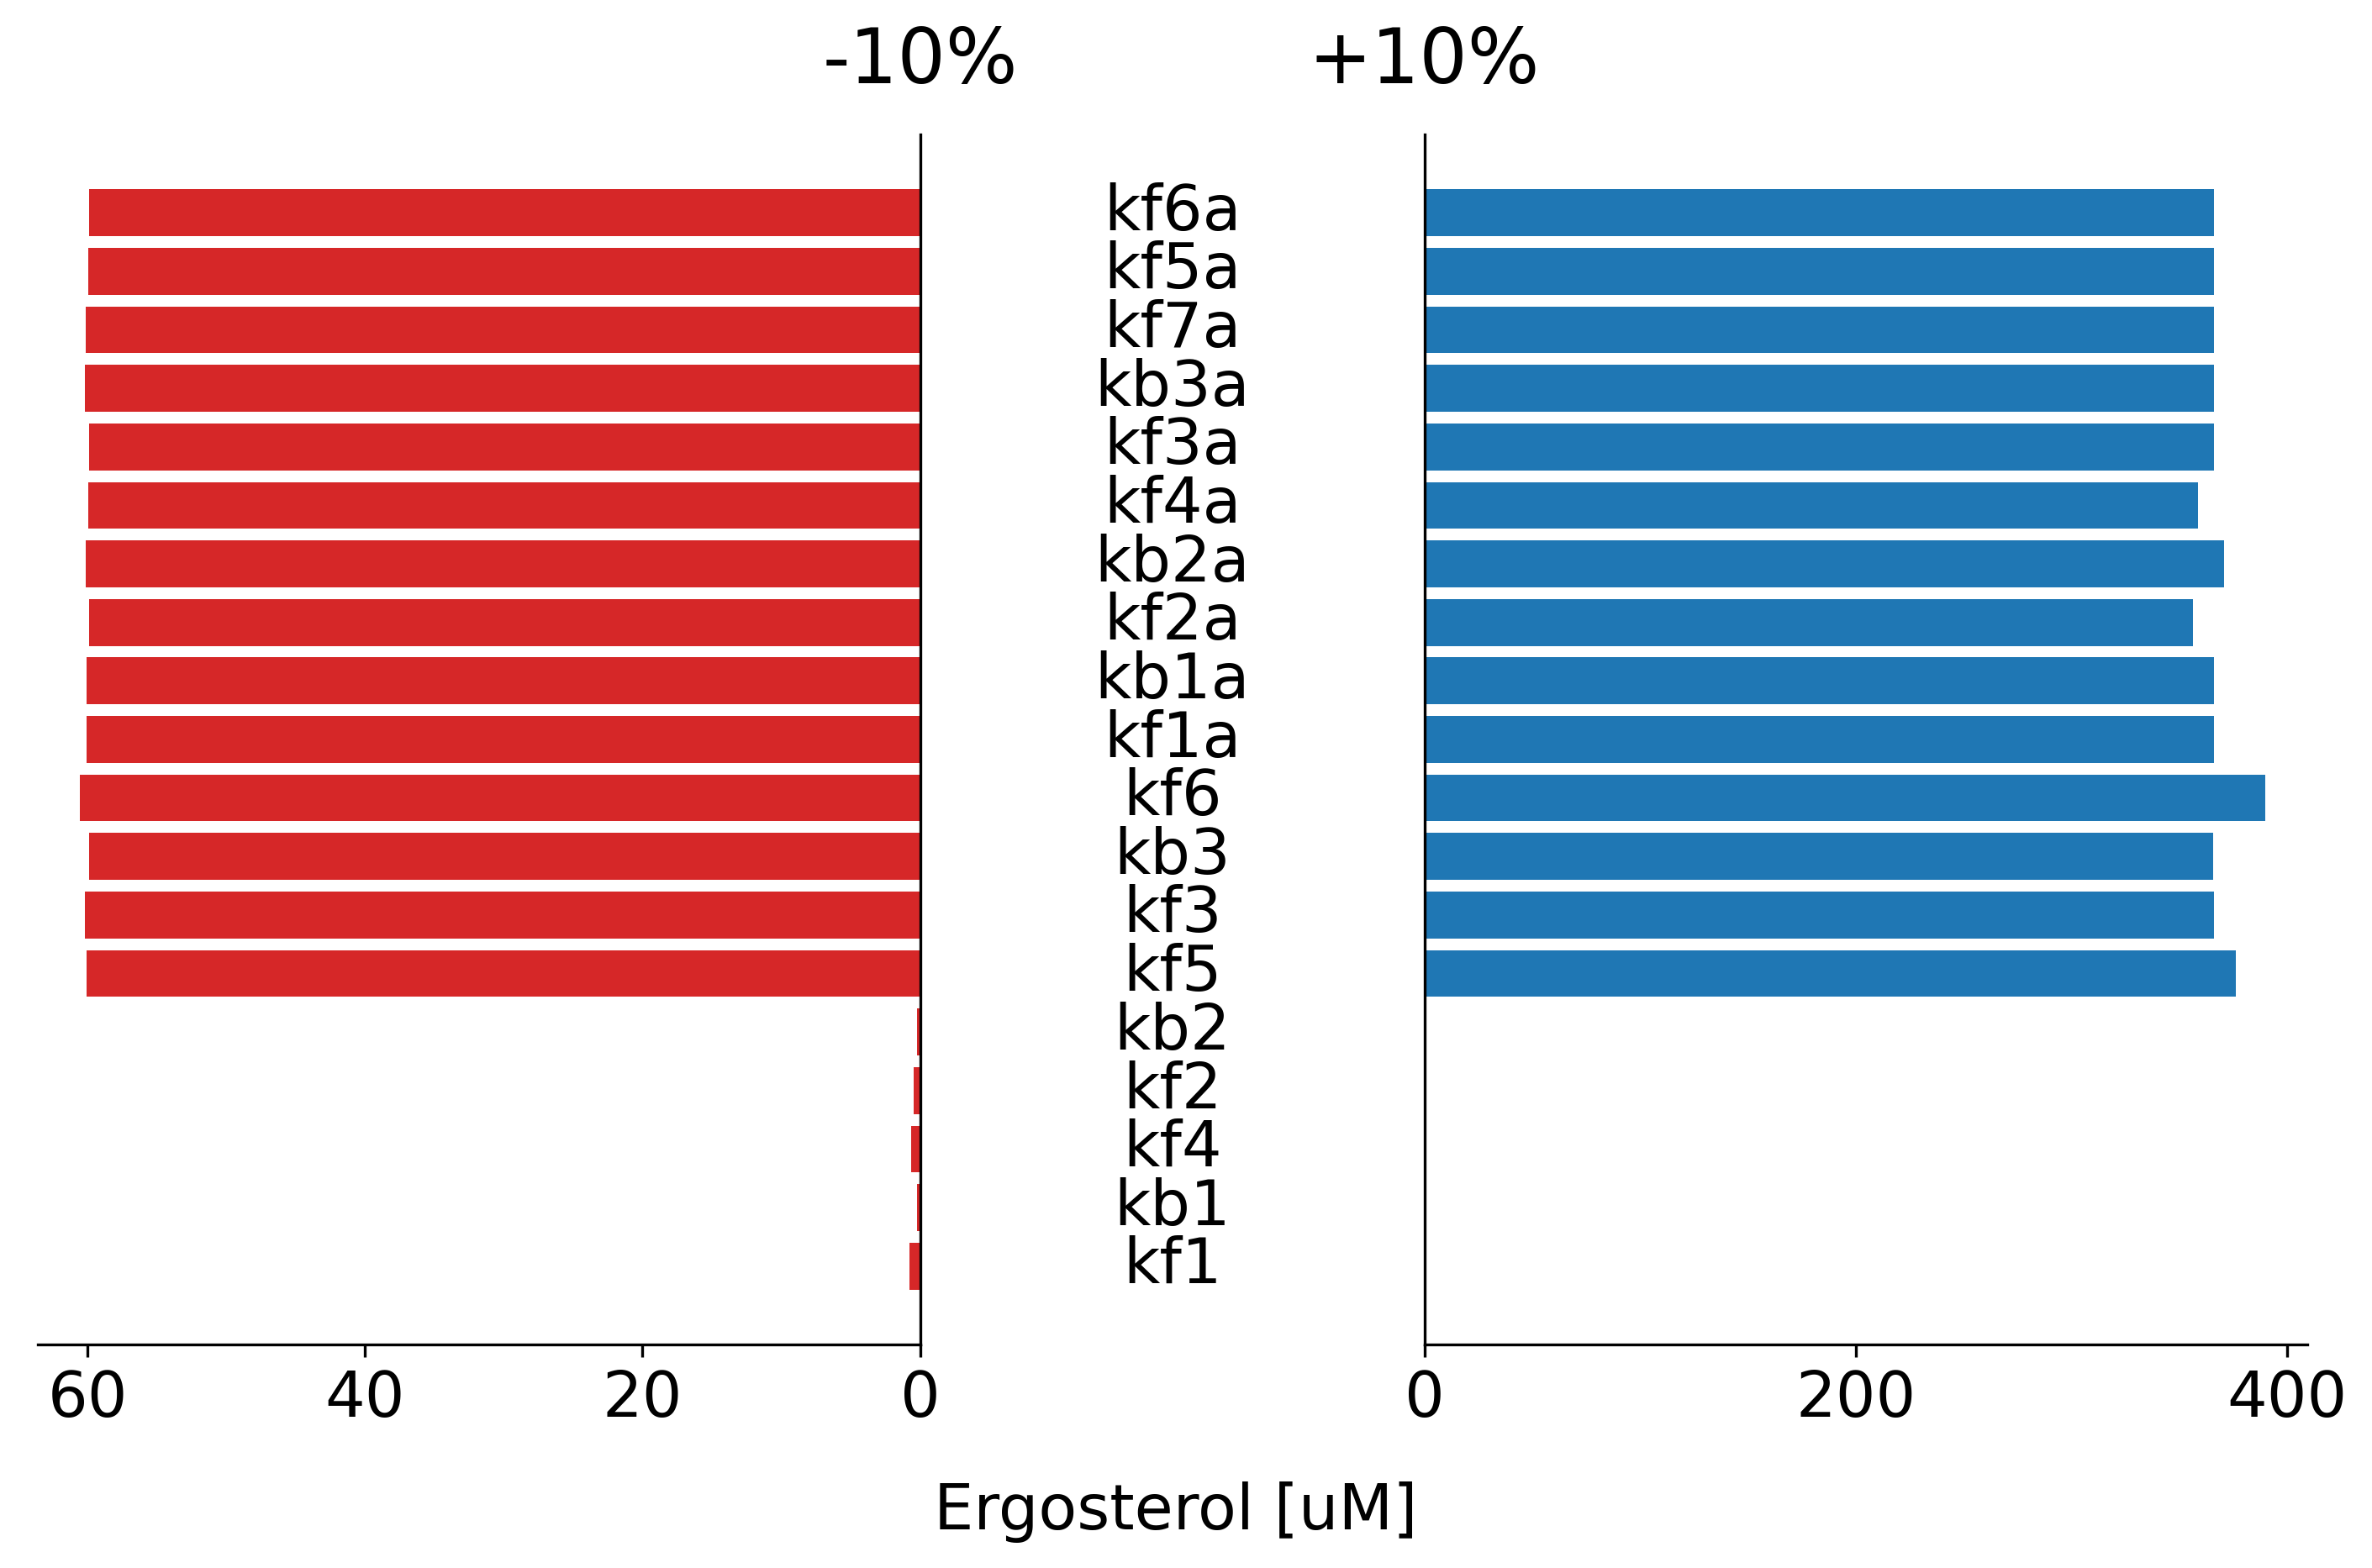

In [49]:
import numpy as np
import matplotlib.pyplot as plt

BASE_ERGOSTEROL = 65.41

params = [
    'kf1',
    'kb1',
    'kf4',
    'kf2',
    'kb2',
    'kf5',
    'kf3',
    'kb3',
    'kf6',
    'kf1a',
    'kb1a',
    'kf2a',
    'kb2a',
    'kf4a',
    'kf3a',
    'kb3a',
    'kf7a',
    'kf5a',
    'kf6a'
]

num_params = len(params)

ergosterol_azole_plus = np.array([
    abs(y_s6_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s7_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s8_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s9_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s10_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s11_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s12_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s13_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s14_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s15_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s16_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s17_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s18_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s19_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s20_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s21_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s22_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s23_c4[-1,9]-BASE_ERGOSTEROL),
    abs(y_s24_c4[-1,9]-BASE_ERGOSTEROL)
])
ergosterol_azole_minus = np.array([
    abs(y_s6_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s7_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s8_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s9_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s10_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s11_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s12_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s13_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s14_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s15_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s16_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s17_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s18_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s19_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s20_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s21_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s22_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s23_c2[-1,9]-BASE_ERGOSTEROL),
    abs(y_s24_c2[-1,9]-BASE_ERGOSTEROL)
])

# bars centered on the y axis
pos = np.arange(num_params) + .5

# make the left and right axes
fig = plt.figure(figsize=(10, 6), dpi=300)

ax_minus = fig.add_axes([0.05, 0.1, 0.35, 0.8])
ax_plus = fig.add_axes([0.6, 0.1, 0.35, 0.8])

# turn off the axes spines except on the inside y-axis
for loc, spine in ax_minus.spines.items():
    if loc!='right' and loc!='bottom':
        spine.set_color('none') # don't draw spine

for loc, spine in ax_plus.spines.items():
    if loc!='left' and loc!='bottom':
        spine.set_color('none') # don't draw spine

# make the minus graphs
ax_minus.barh(pos, ergosterol_azole_minus, align='center', facecolor=RED, edgecolor='None')
ax_minus.set_yticks([])
ax_minus.invert_xaxis()

# make the plus graphs
ax_plus.barh(pos, ergosterol_azole_plus, align='center', facecolor=BLUE, edgecolor='None')
ax_plus.set_yticks([])

# we want the labels to be centered in the fig coord system and
# centered w/ respect to the bars so we use a custom transform
import matplotlib.transforms as transforms
transform = transforms.blended_transform_factory(
    fig.transFigure, ax_plus.transData)
for i, label in enumerate(params):
    ax_plus.text(0.5, i+0.5, label, ha='center', va='center', transform=transform)

# the axes titles are in axes coords, so x=0, y=1.025 is on the left
# side of the axes, just above, x=1.0, y=1.025 is the right side of the
# axes, just above
ax_plus.set_title('+10%', x=0.0, y=1.025)
ax_minus.set_title('-10%', x=1.0, y=1.025)
ax_minus.text(-1,-4,'Ergosterol [uM]')

plt.show()
fig.savefig('fig4.pdf',format='pdf',bbox_inches='tight')

# Study 25b: Sensitivity Analysis for Toxic Sterol (Figure 5)

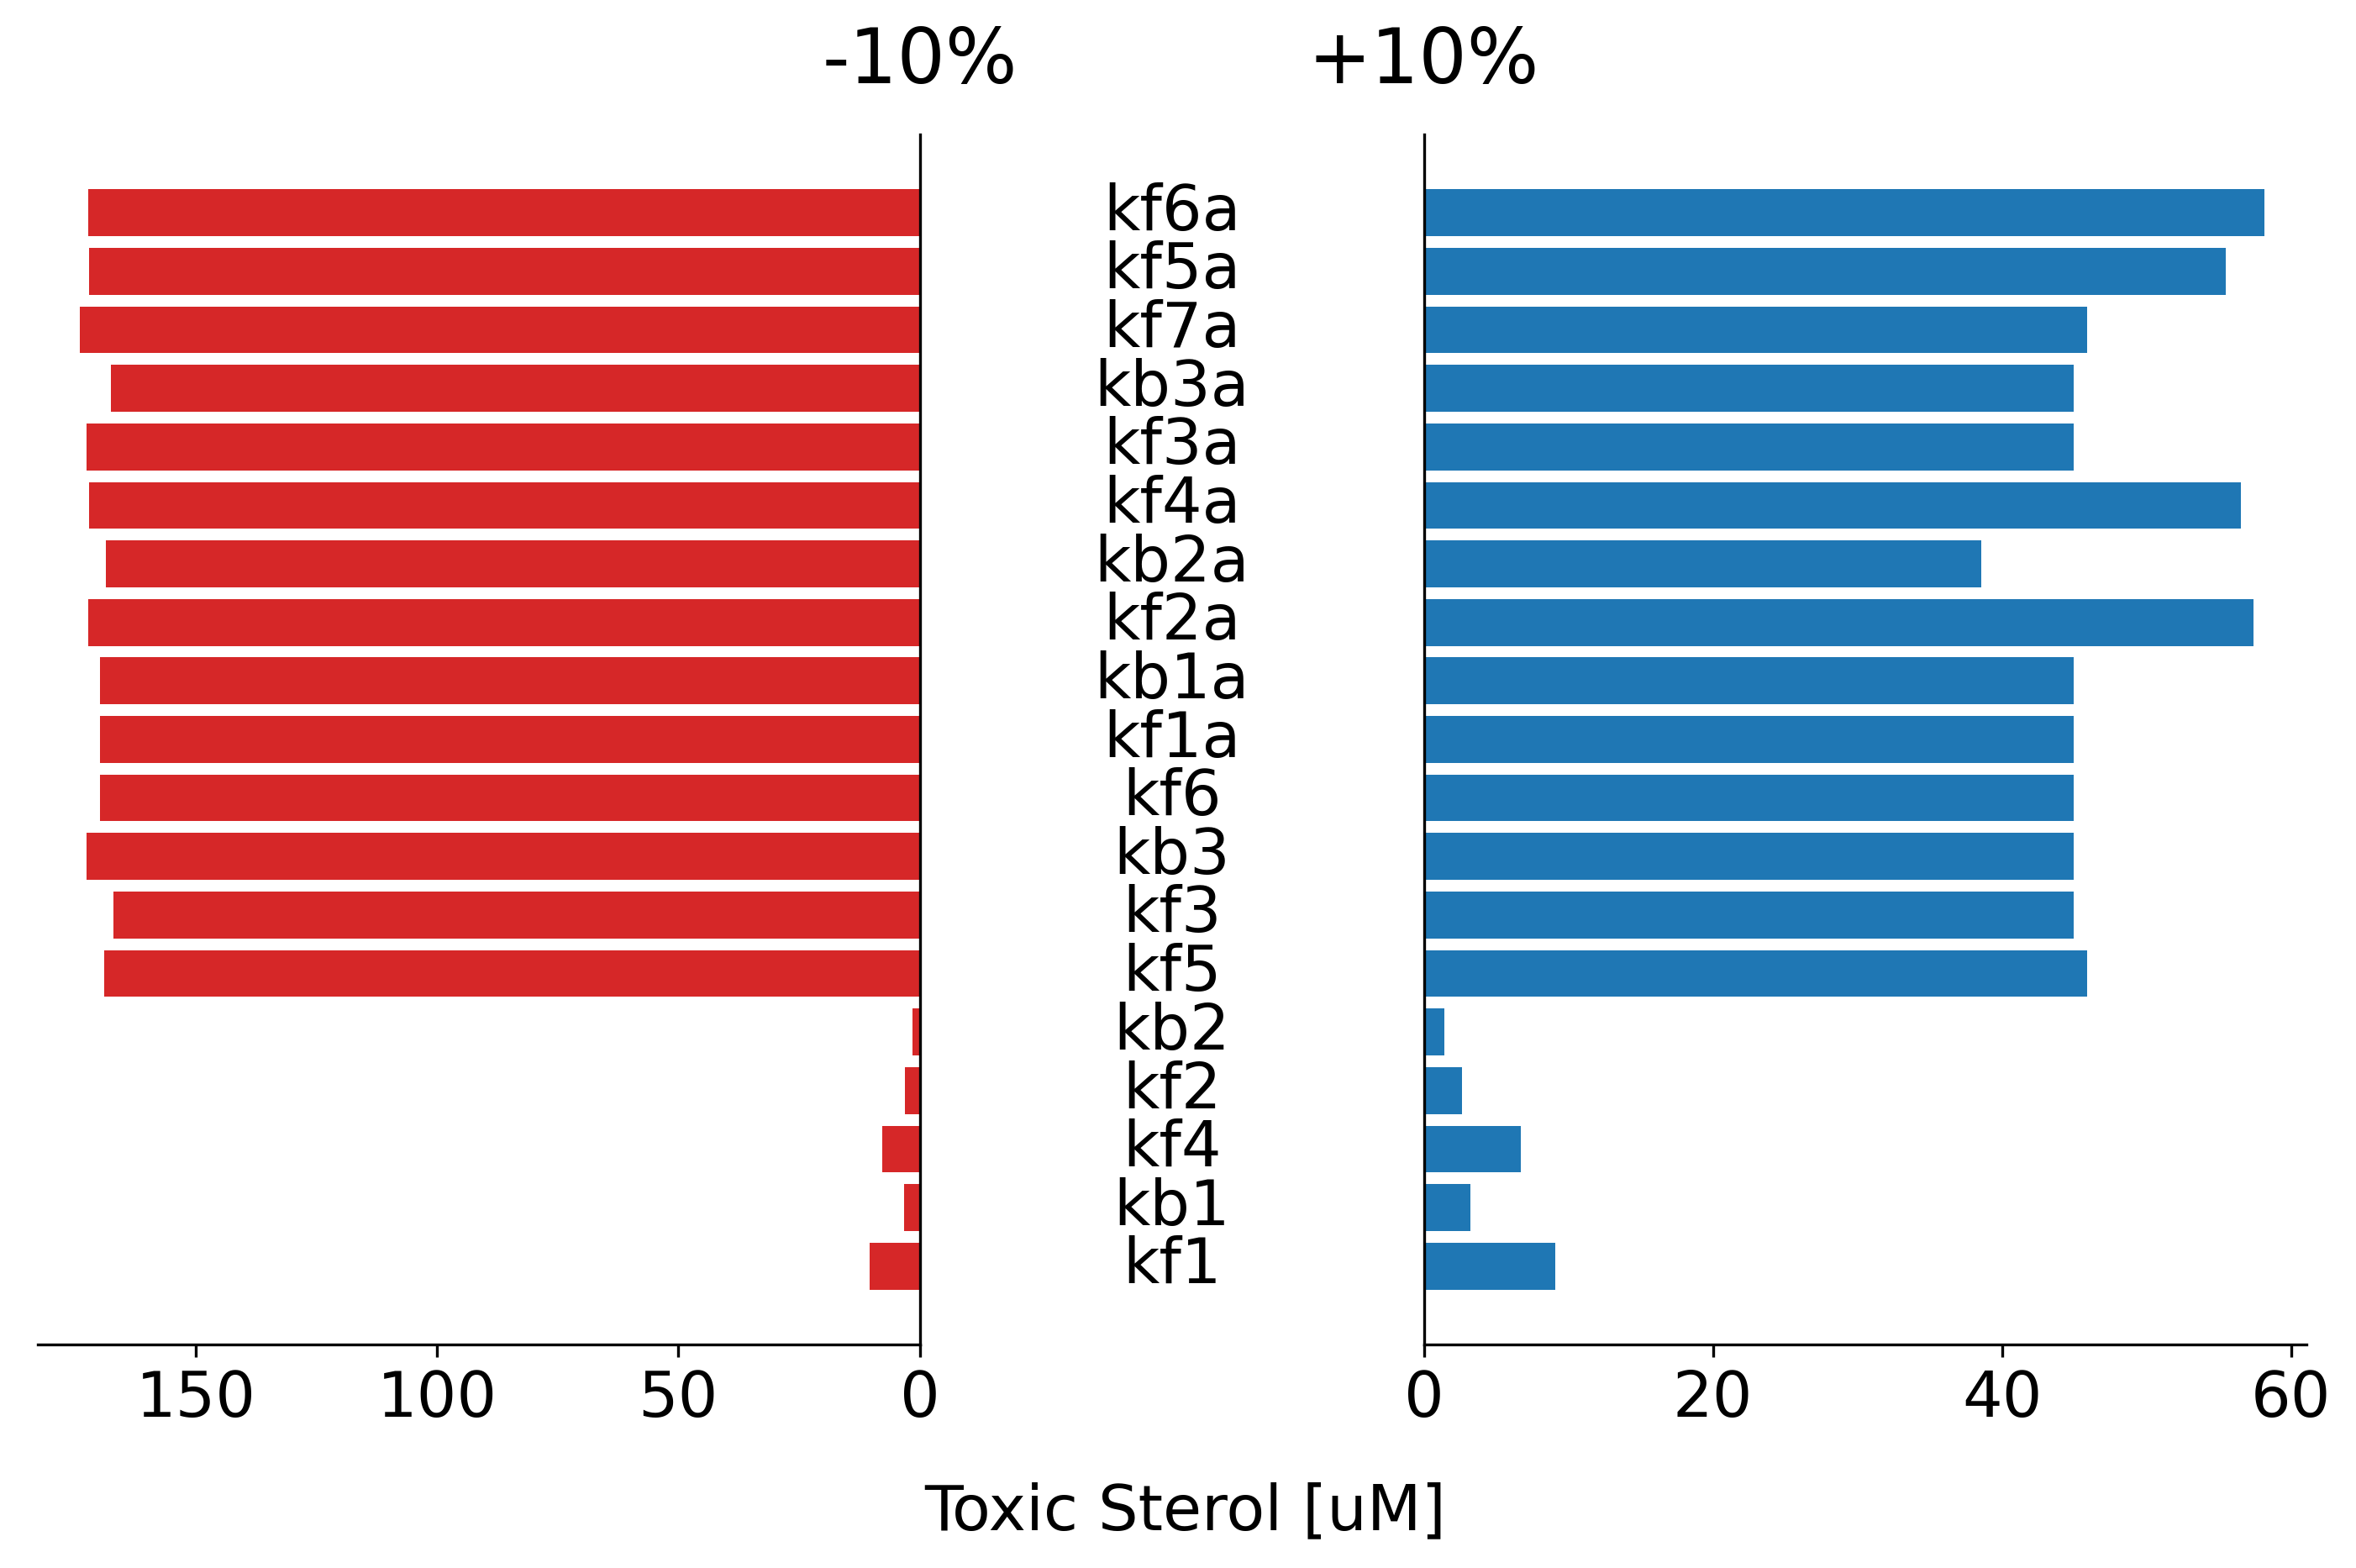

In [54]:
import numpy as np
import matplotlib.pyplot as plt

BASE_TOXIC = 222.01

params = [
    'kf1',
    'kb1',
    'kf4',
    'kf2',
    'kb2',
    'kf5',
    'kf3',
    'kb3',
    'kf6',
    'kf1a',
    'kb1a',
    'kf2a',
    'kb2a',
    'kf4a',
    'kf3a',
    'kb3a',
    'kf7a',
    'kf5a',
    'kf6a'
]

num_params = len(params)

# generate some random data for the graphs (TODO; put real data here)
toxic_azole_plus = np.array([
    abs(y_s6_c4[-1,17]-BASE_TOXIC),
    abs(y_s7_c4[-1,17]-BASE_TOXIC),
    abs(y_s8_c4[-1,17]-BASE_TOXIC),
    abs(y_s9_c4[-1,17]-BASE_TOXIC),
    abs(y_s10_c4[-1,17]-BASE_TOXIC),
    abs(y_s11_c4[-1,17]-BASE_TOXIC),
    abs(y_s12_c4[-1,17]-BASE_TOXIC),
    abs(y_s13_c4[-1,17]-BASE_TOXIC),
    abs(y_s14_c4[-1,17]-BASE_TOXIC),
    abs(y_s15_c4[-1,17]-BASE_TOXIC),
    abs(y_s16_c4[-1,17]-BASE_TOXIC),
    abs(y_s17_c4[-1,17]-BASE_TOXIC),
    abs(y_s18_c4[-1,17]-BASE_TOXIC),
    abs(y_s19_c4[-1,17]-BASE_TOXIC),
    abs(y_s20_c4[-1,17]-BASE_TOXIC),
    abs(y_s21_c4[-1,17]-BASE_TOXIC),
    abs(y_s22_c4[-1,17]-BASE_TOXIC),
    abs(y_s23_c4[-1,17]-BASE_TOXIC),
    abs(y_s24_c4[-1,17]-BASE_TOXIC)
])
toxic_azole_minus = np.array([
    abs(y_s6_c2[-1,17]-BASE_TOXIC),
    abs(y_s7_c2[-1,17]-BASE_TOXIC),
    abs(y_s8_c2[-1,17]-BASE_TOXIC),
    abs(y_s9_c2[-1,17]-BASE_TOXIC),
    abs(y_s10_c2[-1,17]-BASE_TOXIC),
    abs(y_s11_c2[-1,17]-BASE_TOXIC),
    abs(y_s12_c2[-1,17]-BASE_TOXIC),
    abs(y_s13_c2[-1,17]-BASE_TOXIC),
    abs(y_s14_c2[-1,17]-BASE_TOXIC),
    abs(y_s15_c2[-1,17]-BASE_TOXIC),
    abs(y_s16_c2[-1,17]-BASE_TOXIC),
    abs(y_s17_c2[-1,17]-BASE_TOXIC),
    abs(y_s18_c2[-1,17]-BASE_TOXIC),
    abs(y_s19_c2[-1,17]-BASE_TOXIC),
    abs(y_s20_c2[-1,17]-BASE_TOXIC),
    abs(y_s21_c2[-1,17]-BASE_TOXIC),
    abs(y_s22_c2[-1,17]-BASE_TOXIC),
    abs(y_s23_c2[-1,17]-BASE_TOXIC),
    abs(y_s24_c2[-1,17]-BASE_TOXIC)
])

# bars centered on the y axis
pos = np.arange(num_params) + .5

# make the left and right axes
fig = plt.figure(figsize=(10, 6), dpi=300)

ax_minus = fig.add_axes([0.05, 0.1, 0.35, 0.8])
ax_plus = fig.add_axes([0.6, 0.1, 0.35, 0.8])

# turn off the axes spines except on the inside y-axis
for loc, spine in ax_minus.spines.items():
    if loc!='right' and loc!='bottom':
        spine.set_color('none') # don't draw spine

for loc, spine in ax_plus.spines.items():
    if loc!='left' and loc!='bottom':
        spine.set_color('none') # don't draw spine

# make the minus graphs
ax_minus.barh(pos, toxic_azole_minus, align='center', facecolor=RED, edgecolor='None')
ax_minus.set_yticks([])
ax_minus.invert_xaxis()

# make the plus graphs
ax_plus.barh(pos, toxic_azole_plus, align='center', facecolor=BLUE, edgecolor='None')
ax_plus.set_yticks([])

# we want the labels to be centered in the fig coord system and
# centered w/ respect to the bars so we use a custom transform
import matplotlib.transforms as transforms
transform = transforms.blended_transform_factory(
    fig.transFigure, ax_plus.transData)
for i, label in enumerate(params):
    ax_plus.text(0.5, i+0.5, label, ha='center', va='center', transform=transform)

# the axes titles are in axes coords, so x=0, y=1.025 is on the left
# side of the axes, just above, x=1.0, y=1.025 is the right side of the
# axes, just above
ax_plus.set_title('+10%', x=0.0, y=1.025)
ax_minus.set_title('-10%', x=1.0, y=1.025)
ax_minus.text(-1,-4,'Toxic Sterol [uM]')

plt.show()
fig.savefig('fig5.pdf',format='pdf',bbox_inches='tight')